In [240]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
import statsmodels.tsa.stattools as stt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
import scipy.stats as stats
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

In [160]:
rcParams['figure.figsize'] = 23, 6

In [161]:
serie_temp_1 = pd.read_csv("serie1.csv")
serie1_df = pd.DataFrame(serie_temp_1)

In [162]:
mes = 1
ano = 21

for i in range(0, 41):
    if mes < 10:
        serie1_df.loc[i, 'COMPETENCIA'] = f'{ano}-0{mes}'
    else:
        serie1_df.loc[i, 'COMPETENCIA'] = f'{ano}-{mes}'

    if mes == 12:
        mes = 0
        ano += 1

    mes += 1

display(serie1_df)

,COMPETENCIA,QT_TRC MWh
0,21-01,12566.9007
1,21-02,10169.1278
2,21-03,10835.7755
3,21-04,9996.1286
4,21-05,9387.1316
5,21-06,8866.1918
6,21-07,9238.8984
7,21-08,9202.3859
8,21-09,8832.1713
9,21-10,10112.1492


In [163]:
serie1_pdseries = pd.Series(serie1_df['QT_TRC MWh'].values, index=serie1_df['COMPETENCIA'].values)
serie1_pdseries

21-01    12566.9007
21-02    10169.1278
21-03    10835.7755
21-04     9996.1286
21-05     9387.1316
21-06     8866.1918
21-07     9238.8984
21-08     9202.3859
21-09     8832.1713
21-10    10112.1492
21-11    10746.5653
21-12    12101.2579
22-01    13735.6339
22-02    11155.5435
22-03    10224.1476
22-04     8999.7919
22-05     9353.1825
22-06     9356.6516
22-07     9496.4263
22-08     9073.5052
22-09     8947.1483
22-10     9861.9239
22-11    10421.1766
22-12    12652.9584
23-01    14214.5059
23-02    11356.3292
23-03    13343.0015
23-04    10487.3751
23-05    10219.8572
23-06     9761.3423
23-07     9591.6413
23-08     9993.7135
23-09     9696.8752
23-10     9777.8998
23-11     9964.2871
23-12    11746.7393
24-01    11510.2128
24-02    12214.3170
24-03    11788.9750
24-04    10860.1451
24-05    10373.0497
dtype: float64

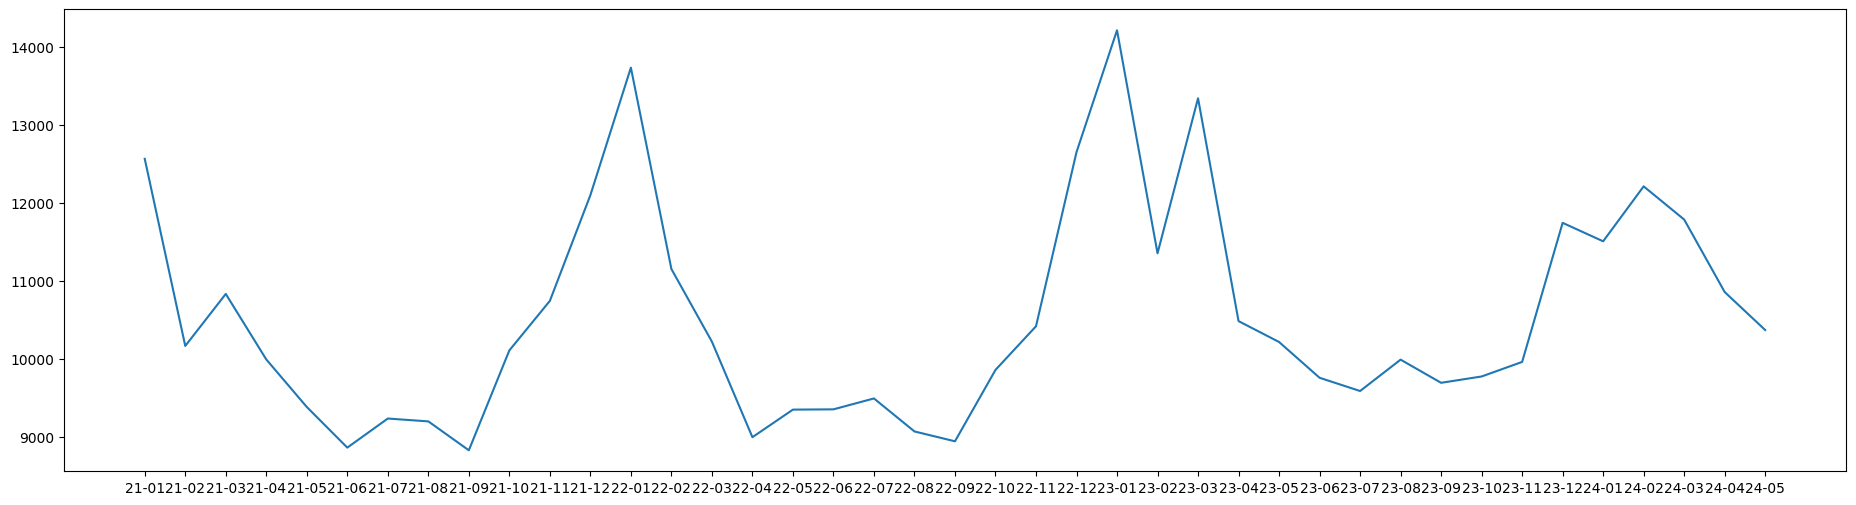

In [164]:
plt.plot(serie1_df['COMPETENCIA'], serie1_df['QT_TRC MWh'])

H0 = série estacionária. valor <= valor crítico
Ha = série não estacionária. valor > valor crítico

In [165]:
kpss_test = stt.kpss(serie1_pdseries)
print(f'Valor do teste: {kpss_test[0]}')
print(f'P-Value: {kpss_test[1]}')
print(f'Número de lags: {kpss_test[2]}')
print('Valores críticos:')
for chave, valor in kpss_test[3].items():
    print(f'{chave}: {valor}')

if kpss_test[0] <= kpss_test[3]['5%']:
    print('Série estacionária')
else:
    print('Série não estacionária')

Valor do teste: 0.10847851385404414
P-Value: 0.1
Número de lags: 3
Valores críticos:
10%: 0.347
5%: 0.463
2.5%: 0.574
1%: 0.739
Série estacionária


C:\Users\Max\AppData\Local\Temp\ipykernel_13924\2070297709.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_test = stt.kpss(serie1_pdseries)


H0 = série não estacionária. valor > valor crítico
Ha = série estacionária. valor <= valor crítico

In [166]:
df_test = stt.adfuller(serie1_pdseries)
print(f'Valor do teste: {df_test[0]}')
print(f'P-Value: {df_test[1]}')
print(f'Número de lags: {df_test[2]}')
print('Valores críticos:')
for chave, valor in df_test[4].items():
    print(f'{chave}: {valor}')

if df_test[0] <= df_test[4]['5%']:
    print('Série estacionária')
else:
    print('Série não estacionária')

Valor do teste: -4.250251362890038
P-Value: 0.0005410800017515721
Número de lags: 7
Valores críticos:
1%: -3.6461350877925254
5%: -2.954126991123355
10%: -2.6159676124885216
Série estacionária


Estacionaridade de segunda ordem

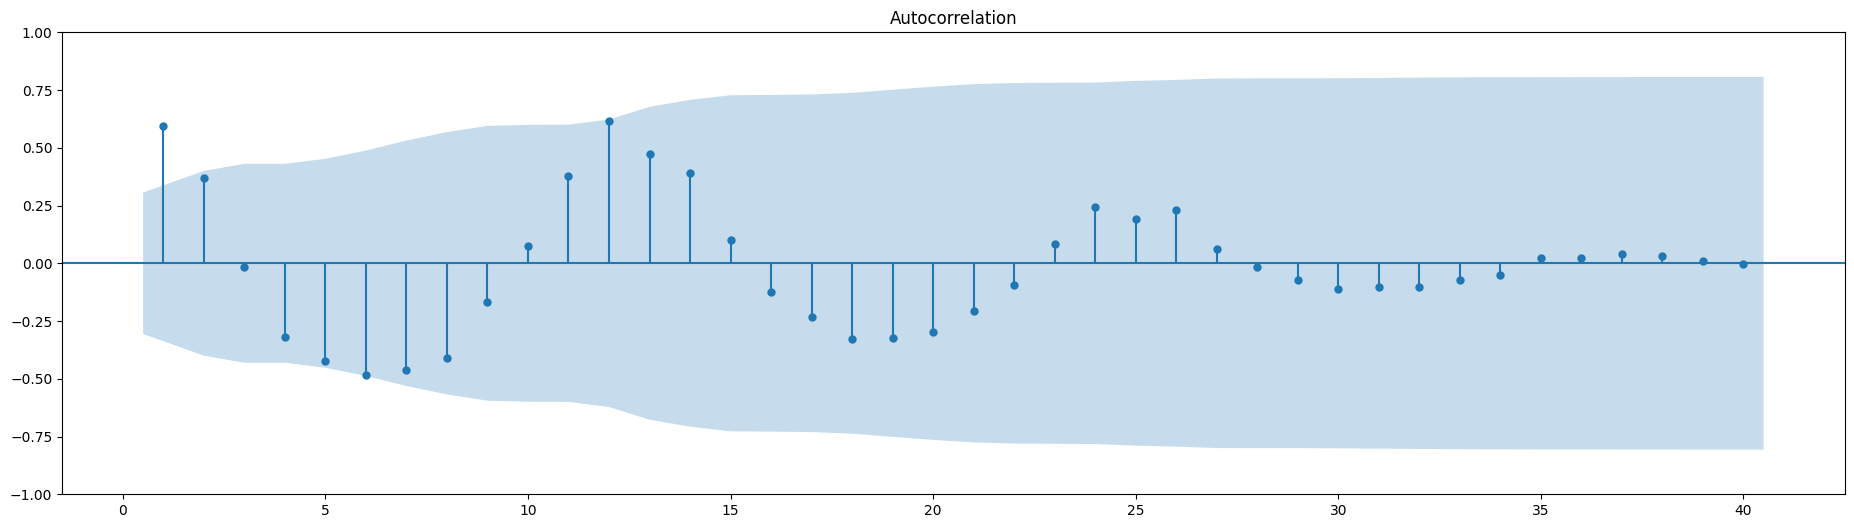

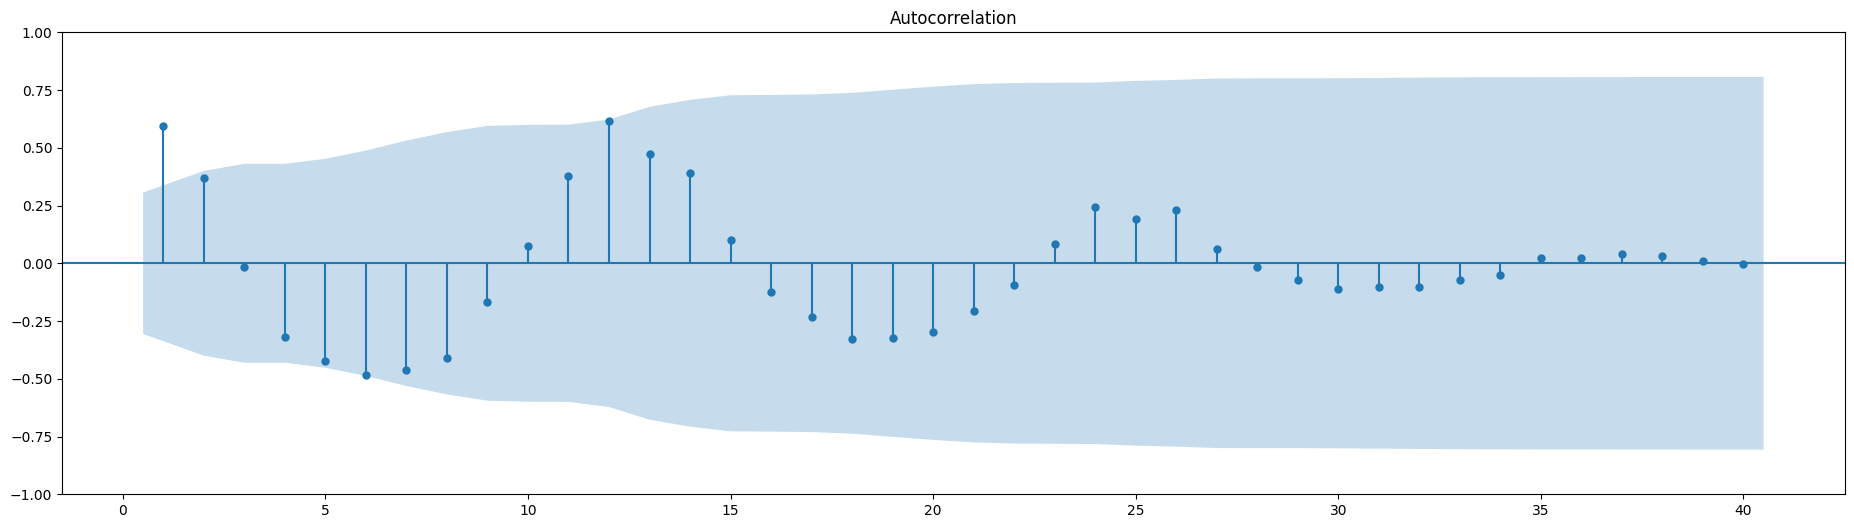

In [167]:
plot_acf(serie1_pdseries, alpha=0.05, zero=False, lags=40)

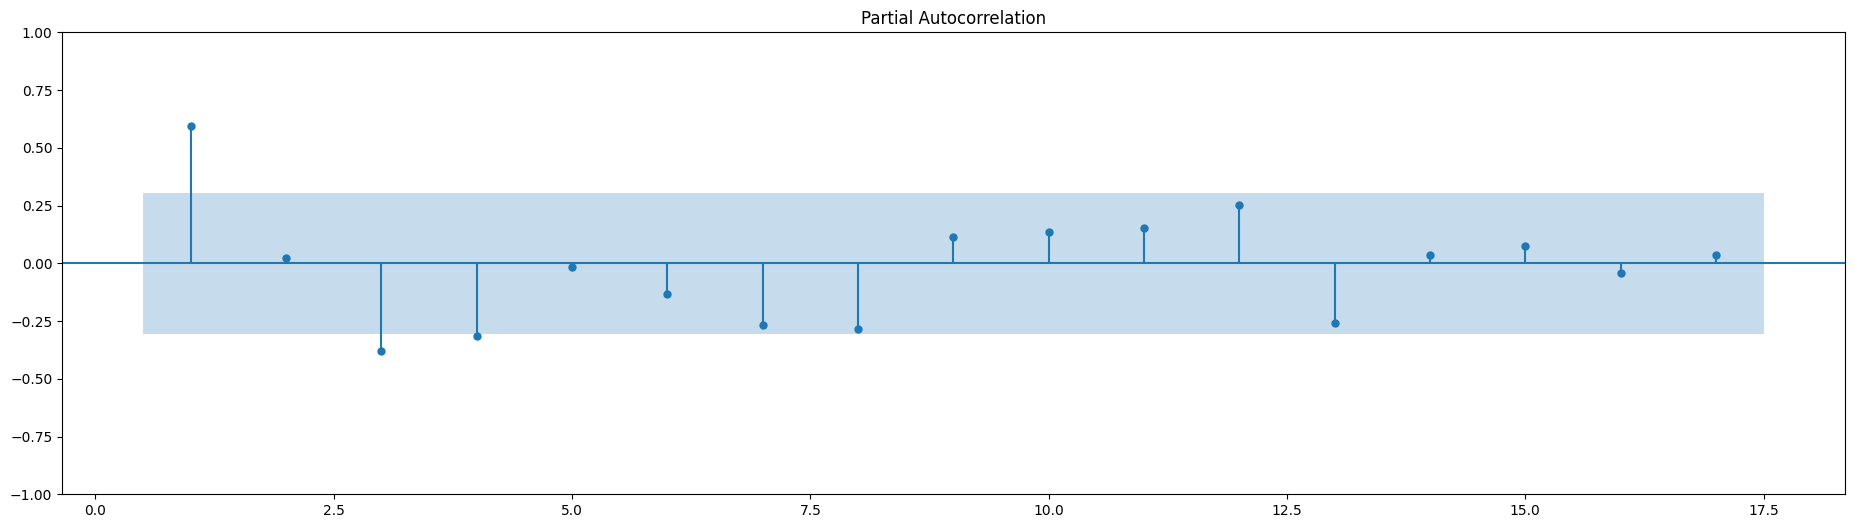

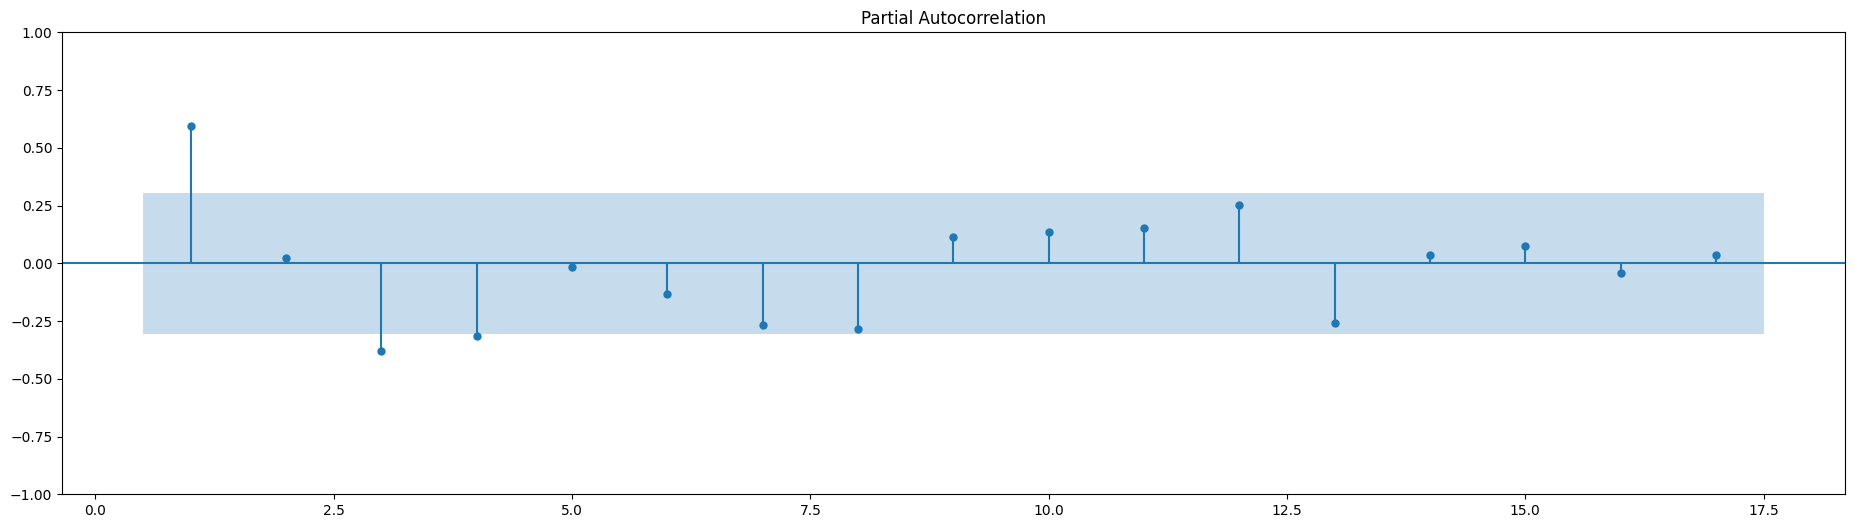

In [168]:
plot_pacf(serie1_pdseries, alpha=0.05, zero=False)

Baixíssima autocorrelação indica certa aleatoriedade nos dados

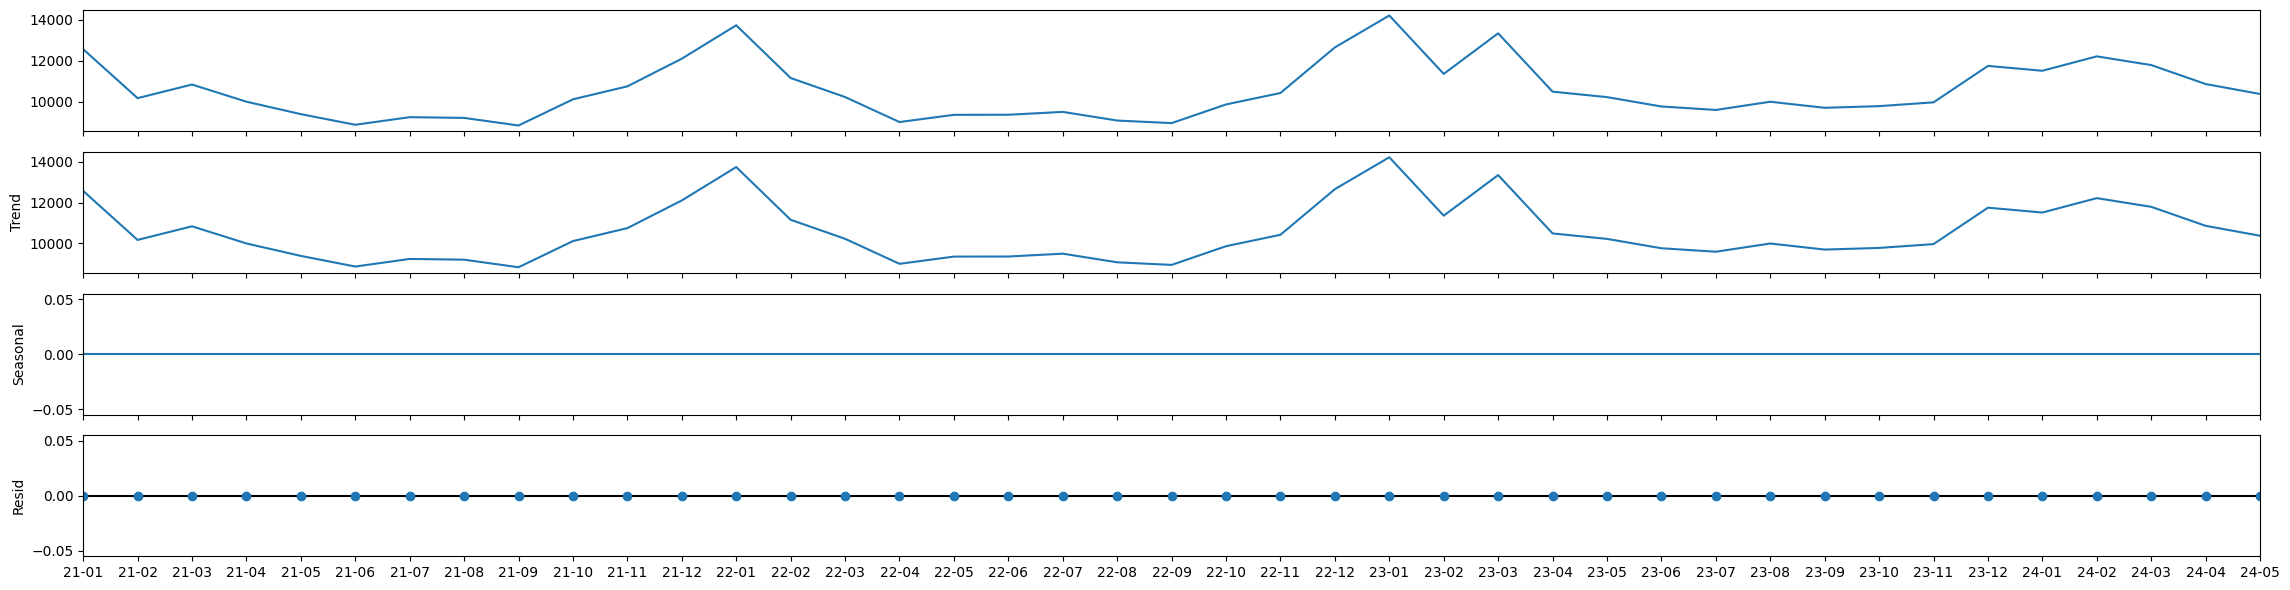

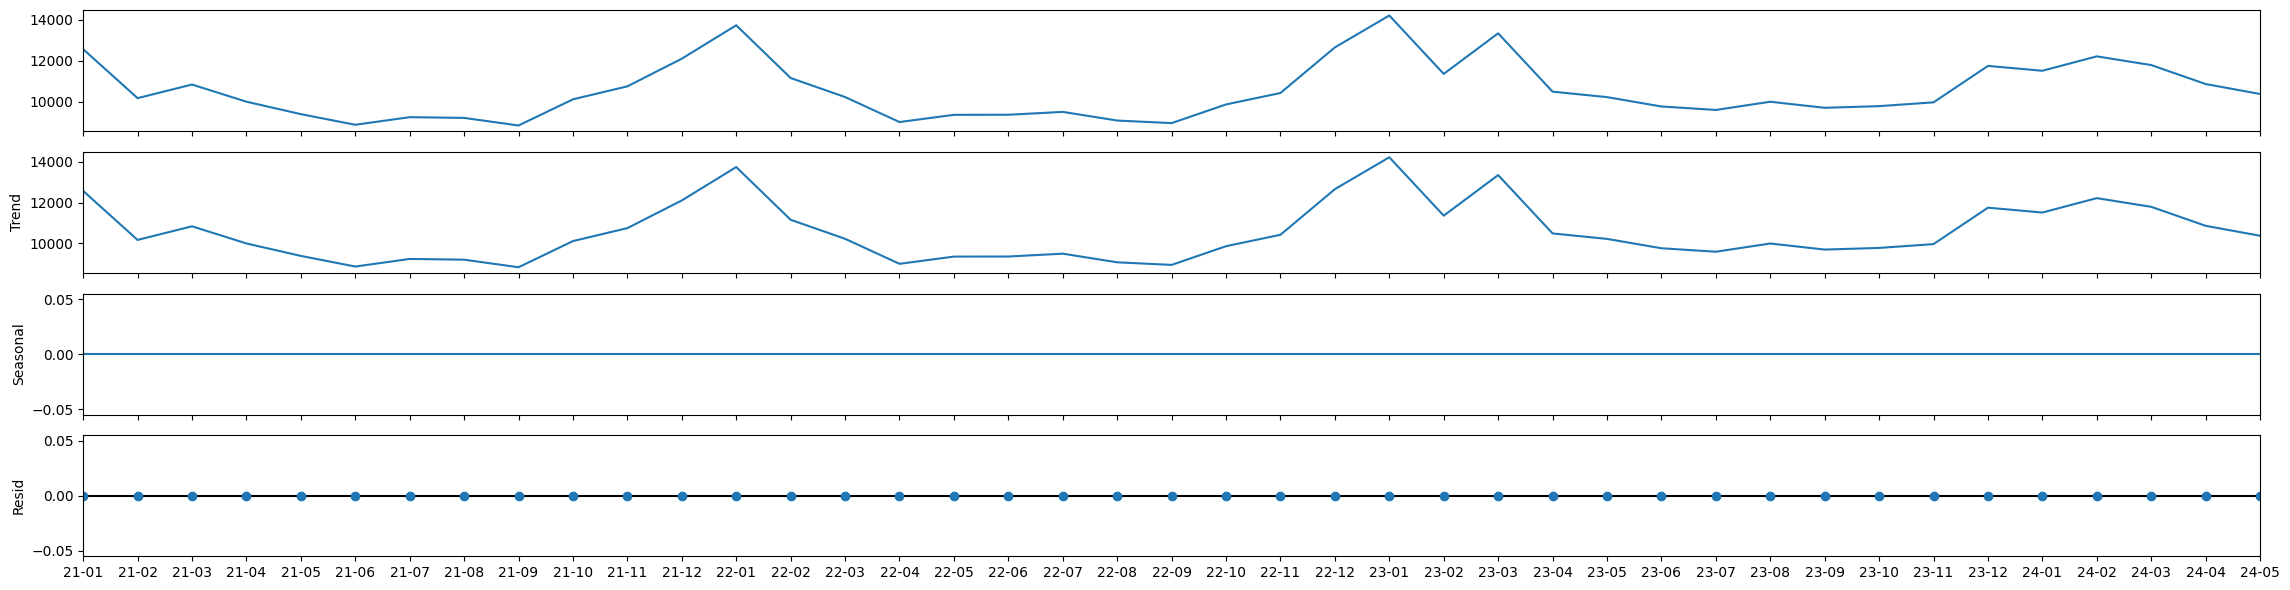

In [169]:
decomposicao_serie1 = seasonal_decompose(serie1_pdseries, period=1)
decomposicao_serie1.plot()

Sem sazonalidade? Talvez a série seja curta demais para perceber uma sazonalidade.
Aparentemente, a tendência é ter um crecimento explosivo no fim do ano e estacionar durante o resto do ano em um valor menor
Vou separar por ano para facilitar a visualização

In [170]:
serie1_pdseries_21 = serie1_pdseries[0:12]
serie1_pdseries_22 = serie1_pdseries[12:24]
serie1_pdseries_23 = serie1_pdseries[24:36]
serie1_pdseries_24 = serie1_pdseries[36:40]

In [171]:
decomposicao_serie1_21 = seasonal_decompose(serie1_pdseries_21, period=1)
decomposicao_serie1_22 = seasonal_decompose(serie1_pdseries_22, period=1)
decomposicao_serie1_23 = seasonal_decompose(serie1_pdseries_23, period=1)
decomposicao_serie1_24 = seasonal_decompose(serie1_pdseries_24, period=1)

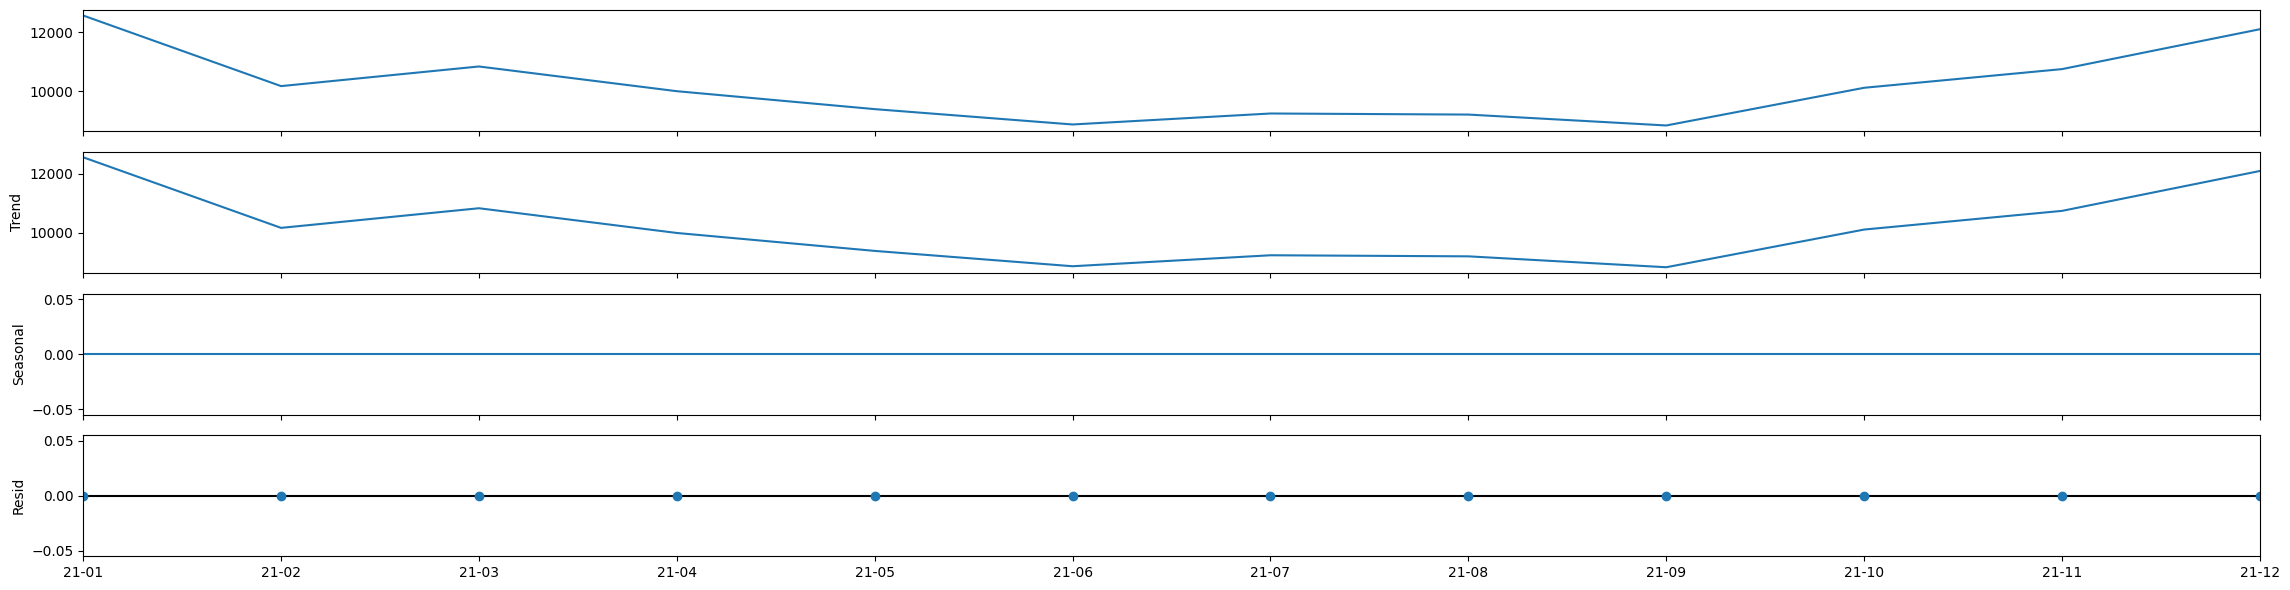

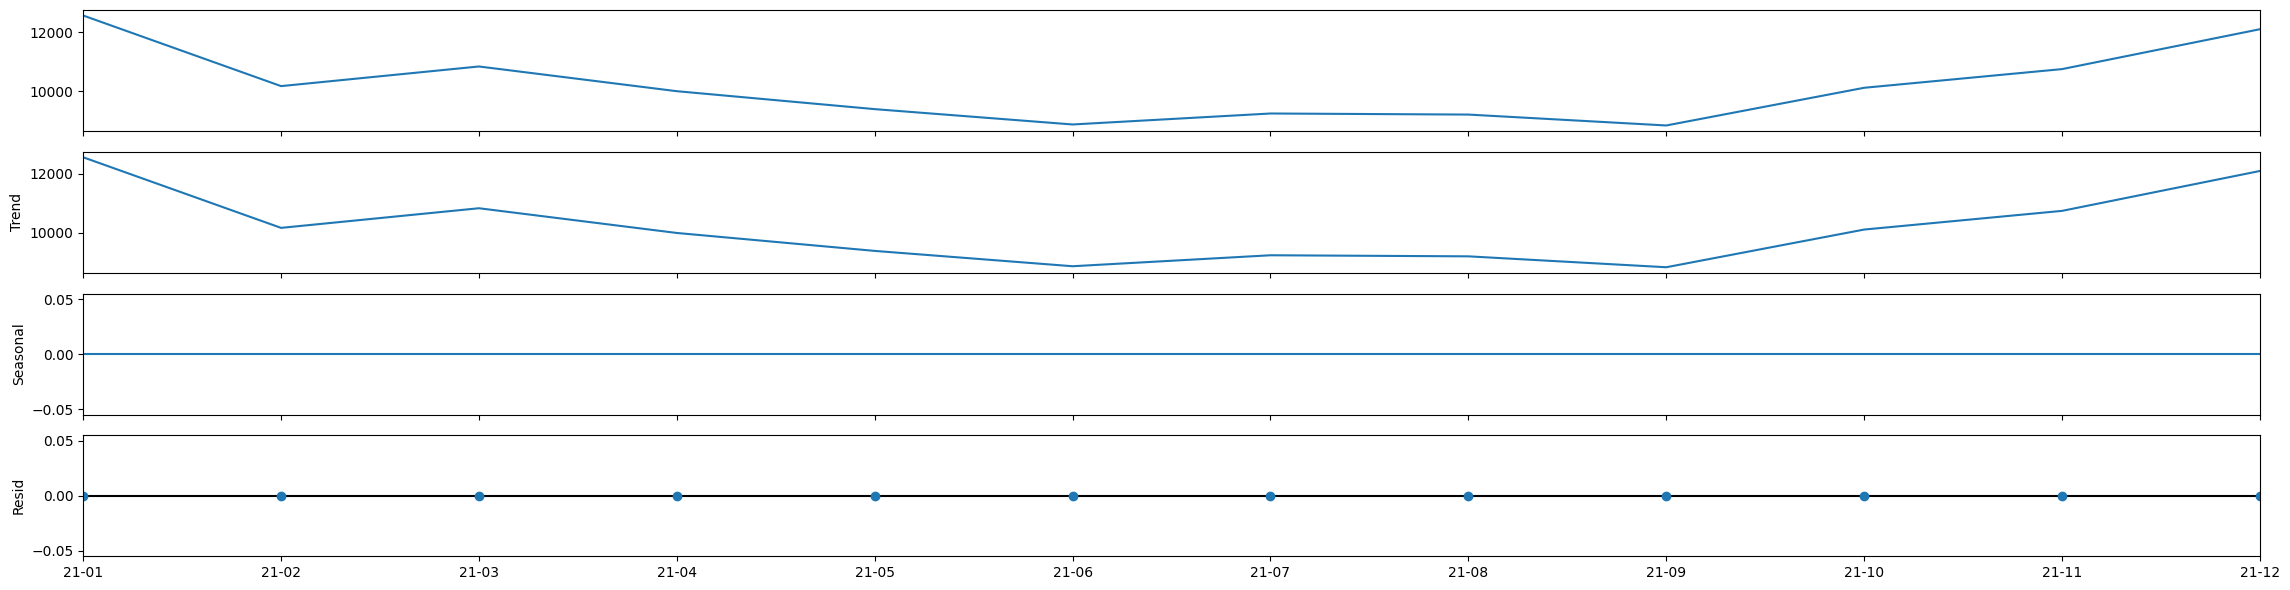

In [172]:
decomposicao_serie1_21.plot()

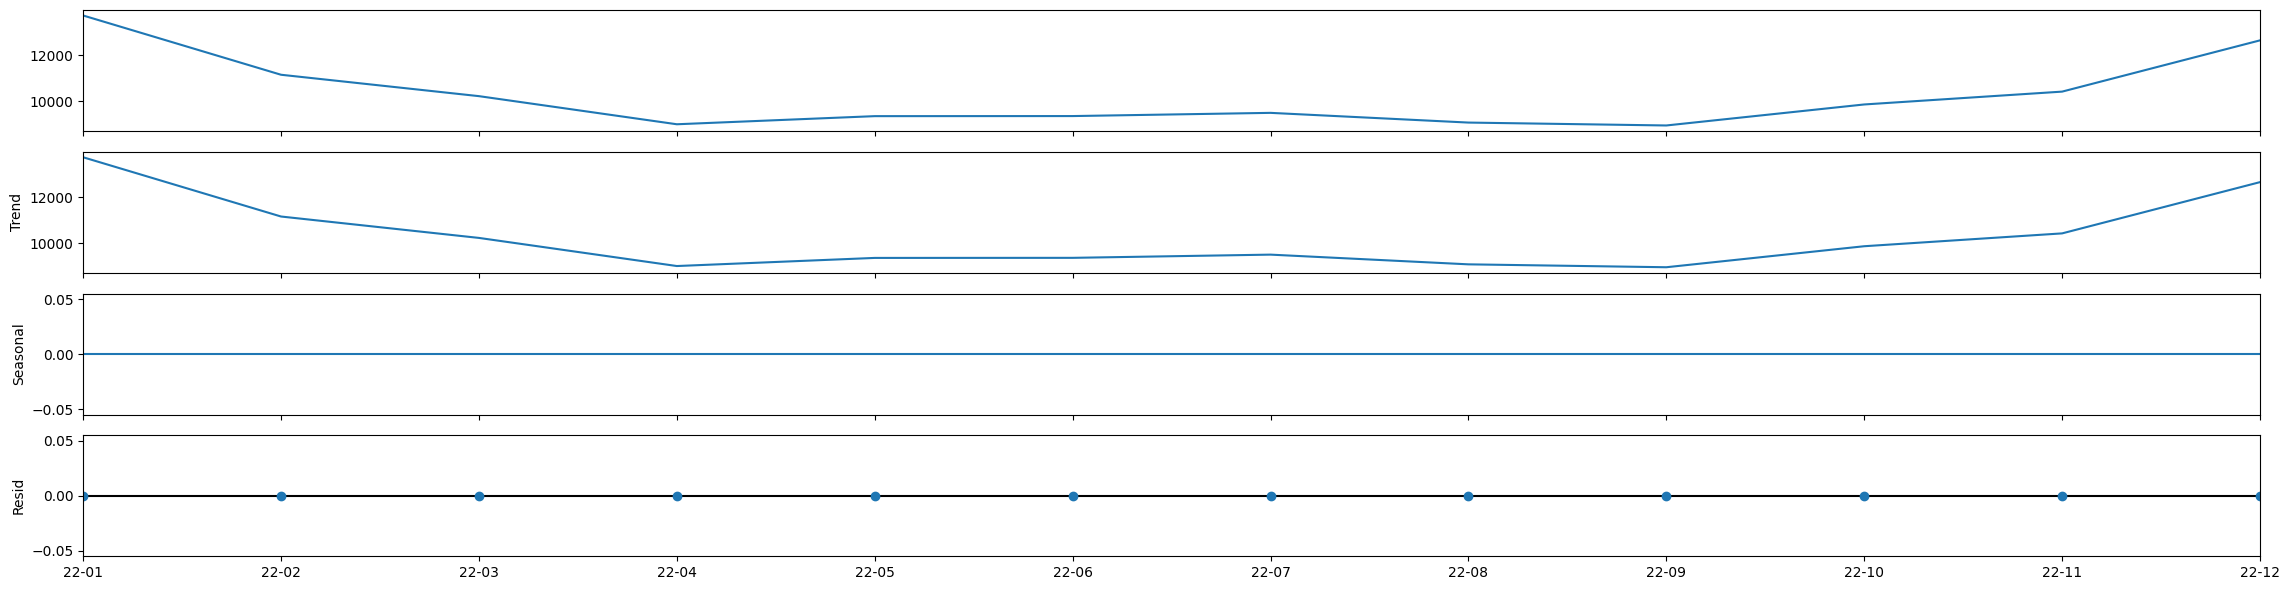

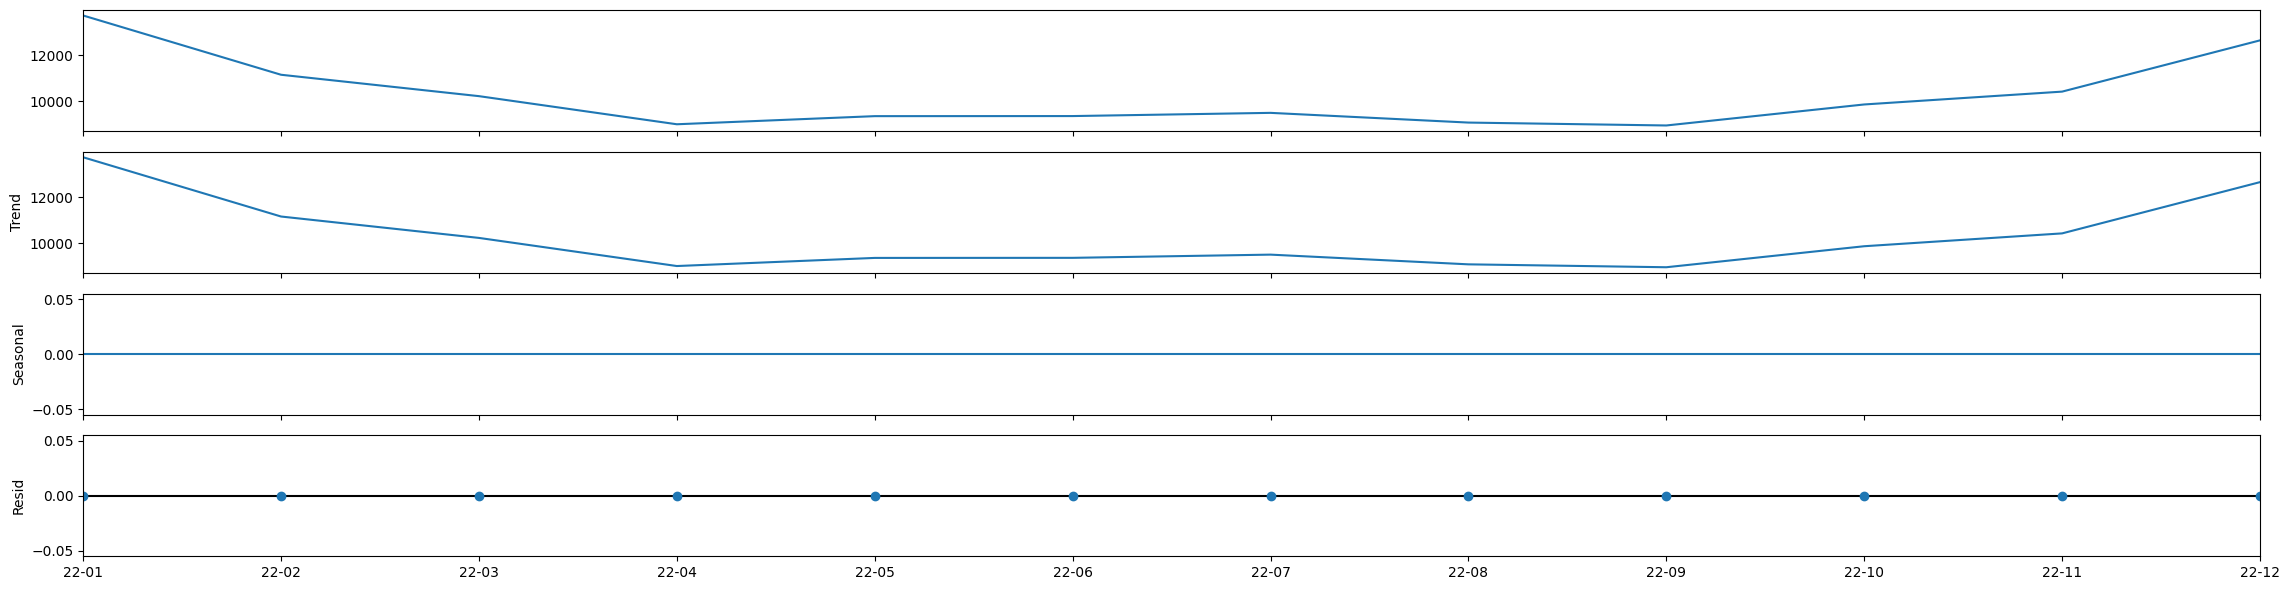

In [173]:
decomposicao_serie1_22.plot()

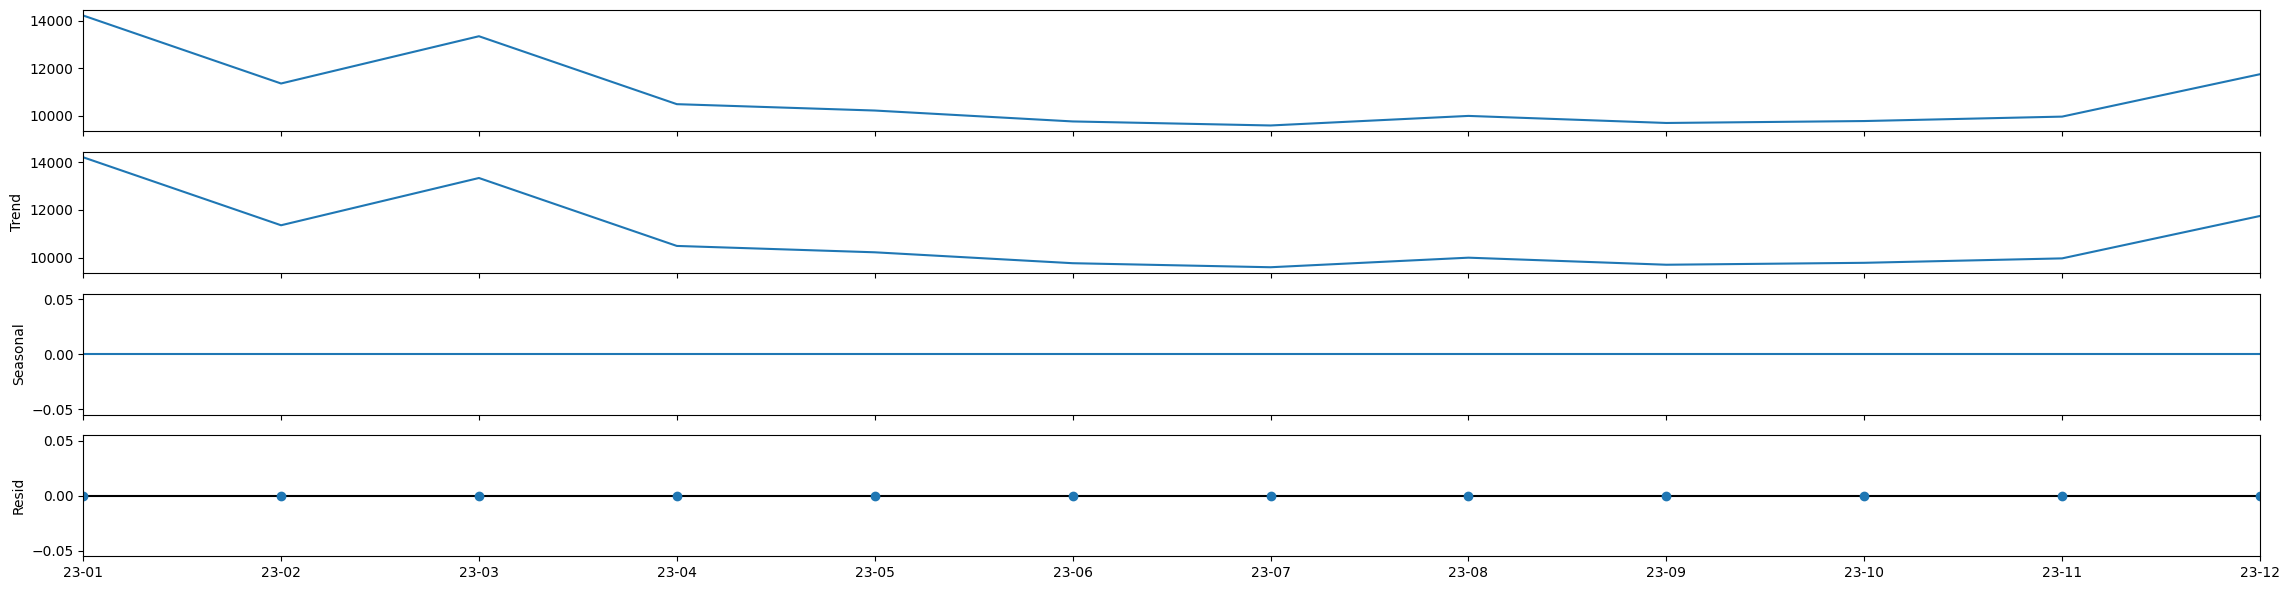

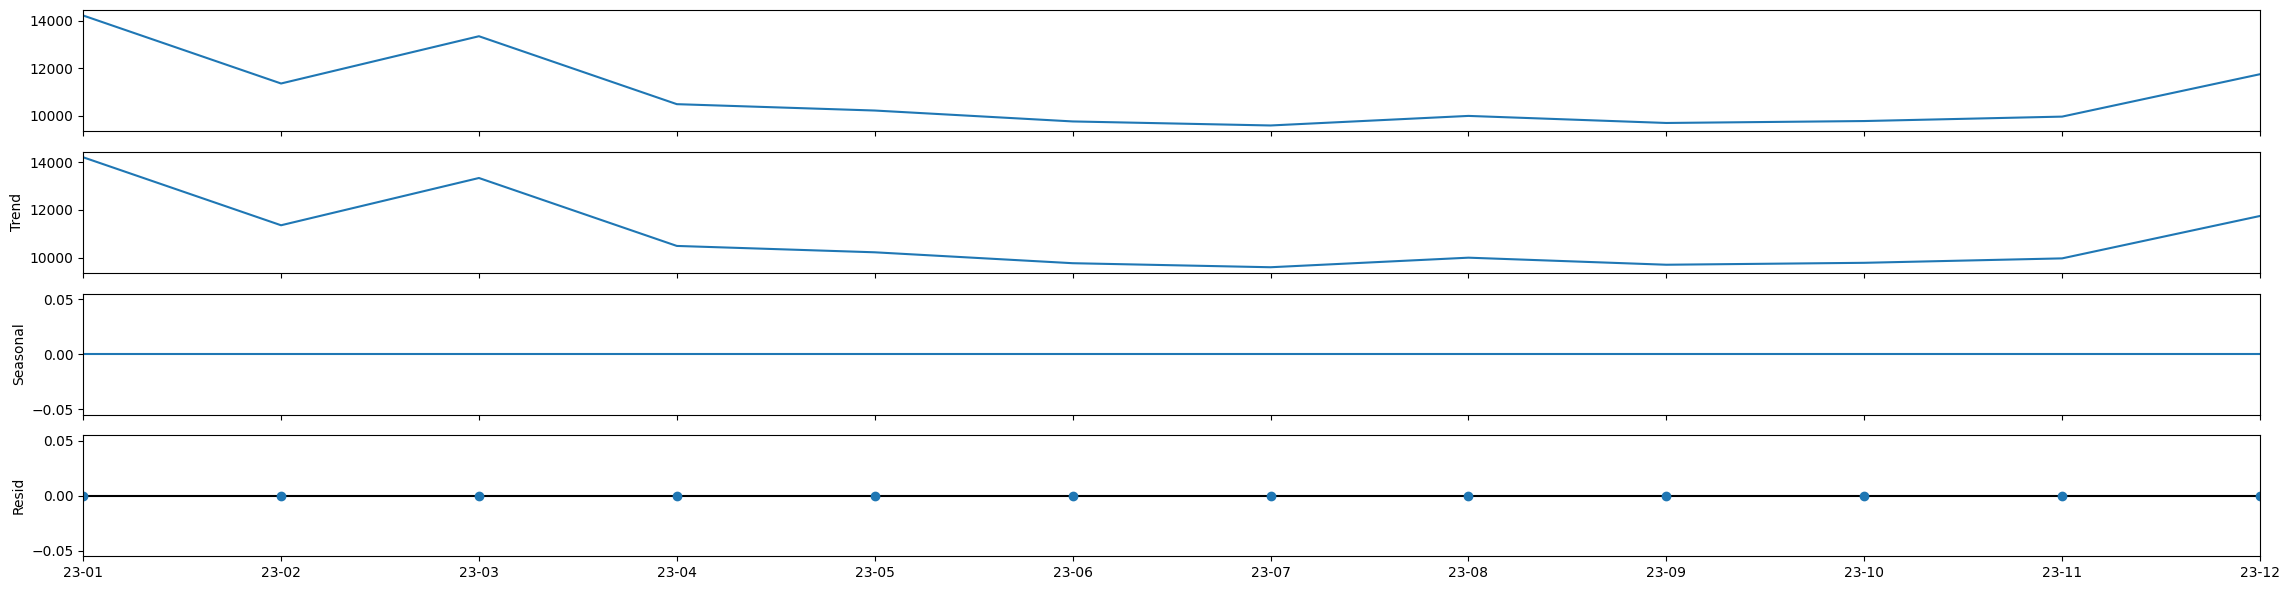

In [174]:
decomposicao_serie1_23.plot()

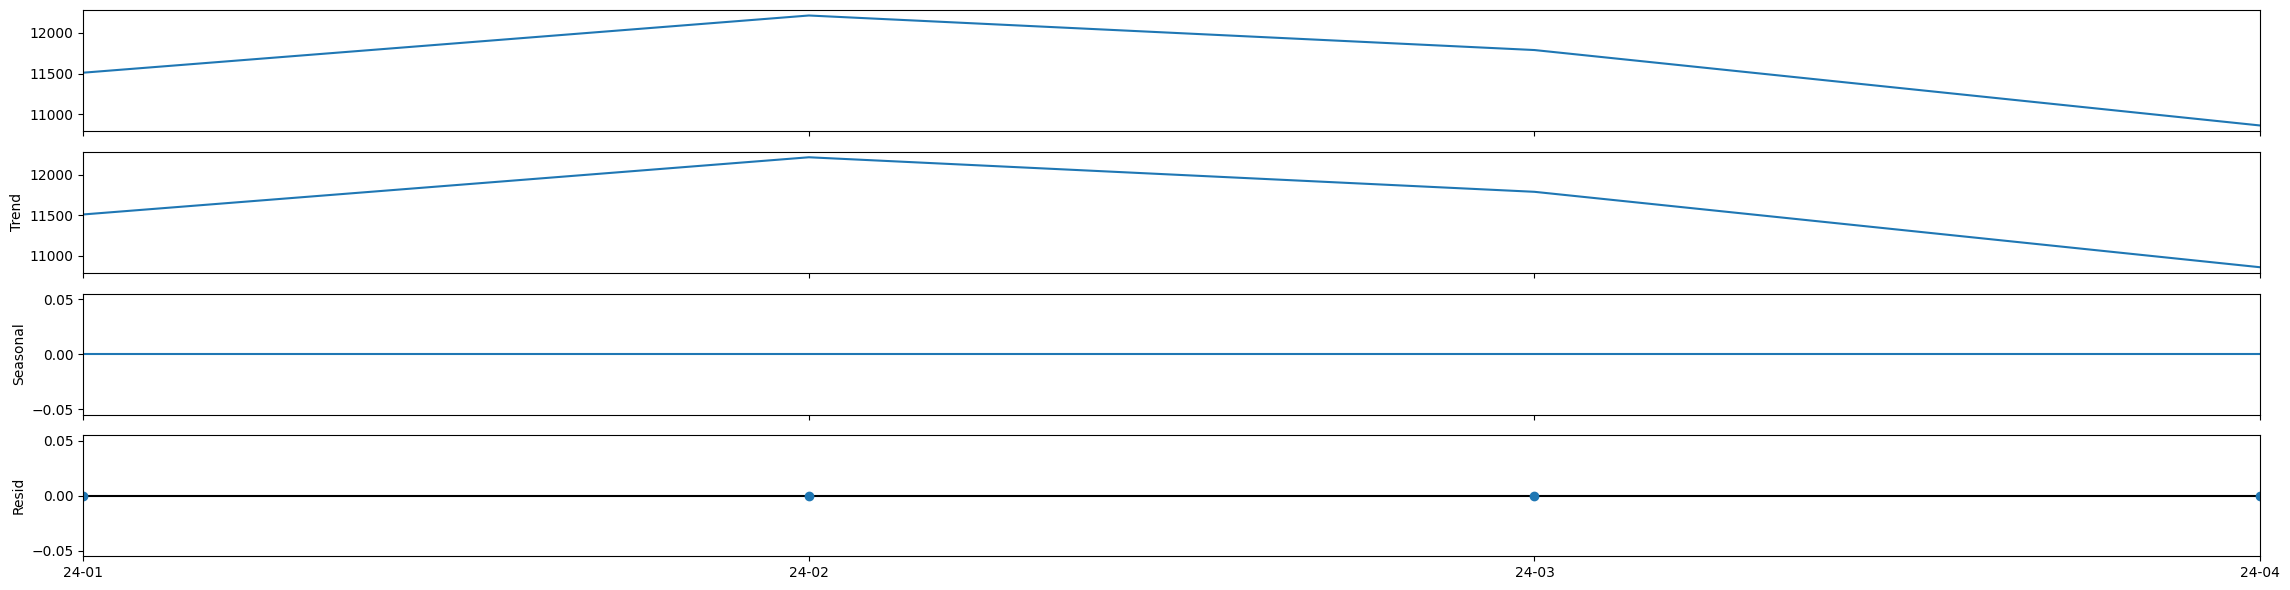

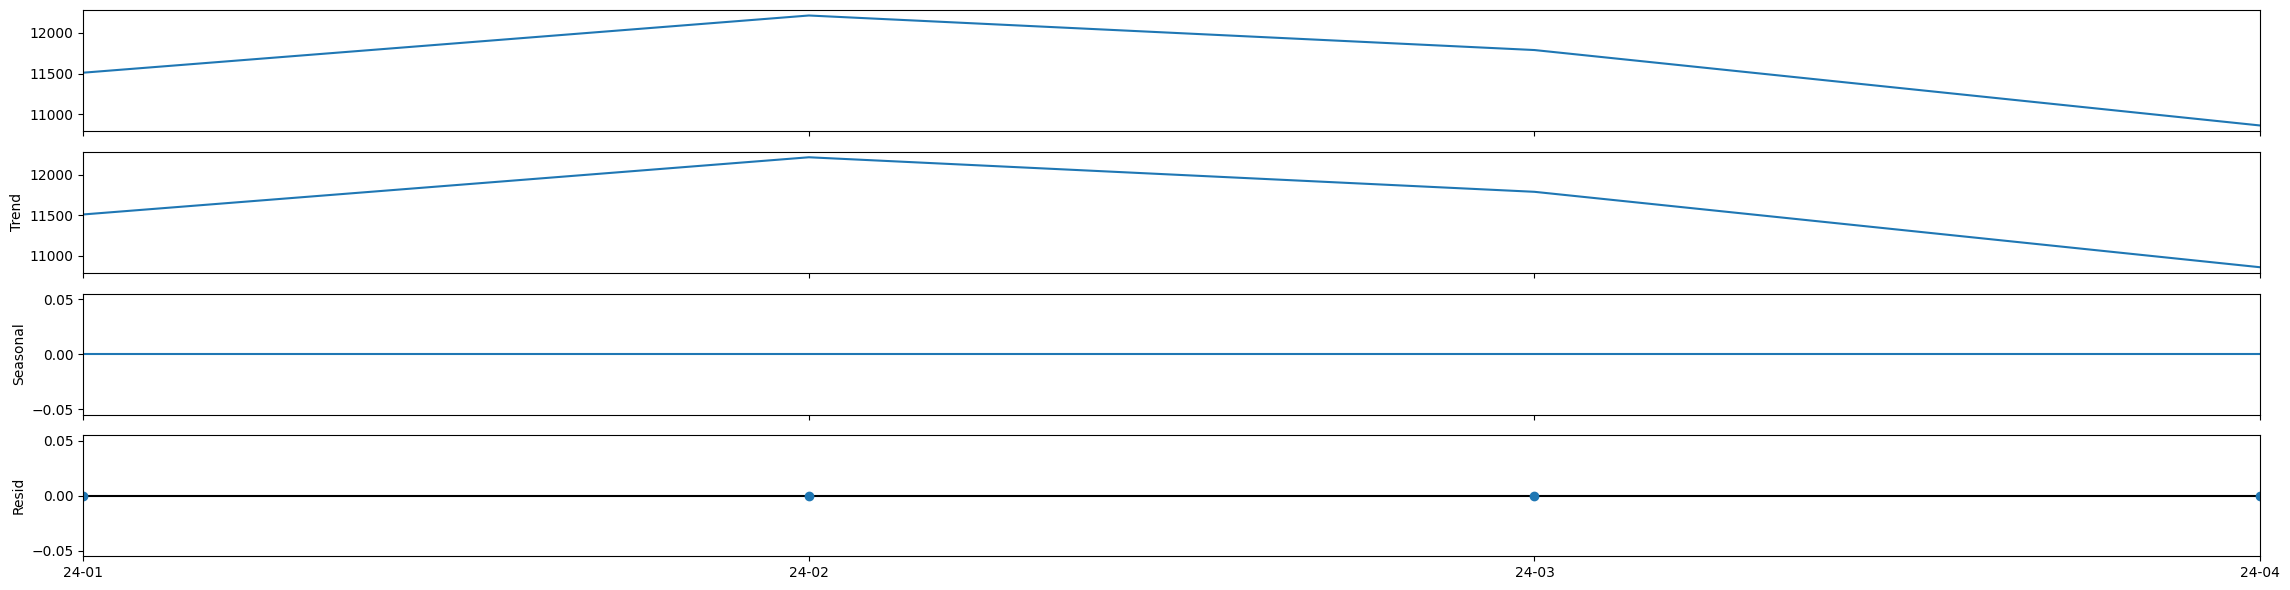

In [175]:
decomposicao_serie1_24.plot()

Em geral, o uso de energia tem um crescimento no fim do ano, durante dezembro, e descresce a partir de janeiro. Contudo, em 2023 e 2024, houveram também crescimentos em março e fevereiro, respectivamente. Nota-se que, de 2023 para 2024, não houve um grande crescimento no uso de energia em dezembro.

((array([-2.12570479, -1.74291212, -1.51528984, -1.34678628, -1.20968671,
         -1.09219094, -0.98810906, -0.89376191, -0.80676941, -0.72549338,
         -0.64875081, -0.57565335, -0.50551158, -0.43777469, -0.37199083,
         -0.30778002, -0.24481487, -0.18280651, -0.12149384, -0.06063494,
          0.        ,  0.06063494,  0.12149384,  0.18280651,  0.24481487,
          0.30778002,  0.37199083,  0.43777469,  0.50551158,  0.57565335,
          0.64875081,  0.72549338,  0.80676941,  0.89376191,  0.98810906,
          1.09219094,  1.20968671,  1.34678628,  1.51528984,  1.74291212,
          2.12570479]),
  array([ 8832.1713,  8866.1918,  8947.1483,  8999.7919,  9073.5052,
          9202.3859,  9238.8984,  9353.1825,  9356.6516,  9387.1316,
          9496.4263,  9591.6413,  9696.8752,  9761.3423,  9777.8998,
          9861.9239,  9964.2871,  9993.7135,  9996.1286, 10112.1492,
         10169.1278, 10219.8572, 10224.1476, 10373.0497, 10421.1766,
         10487.3751, 10746.5653, 10835.

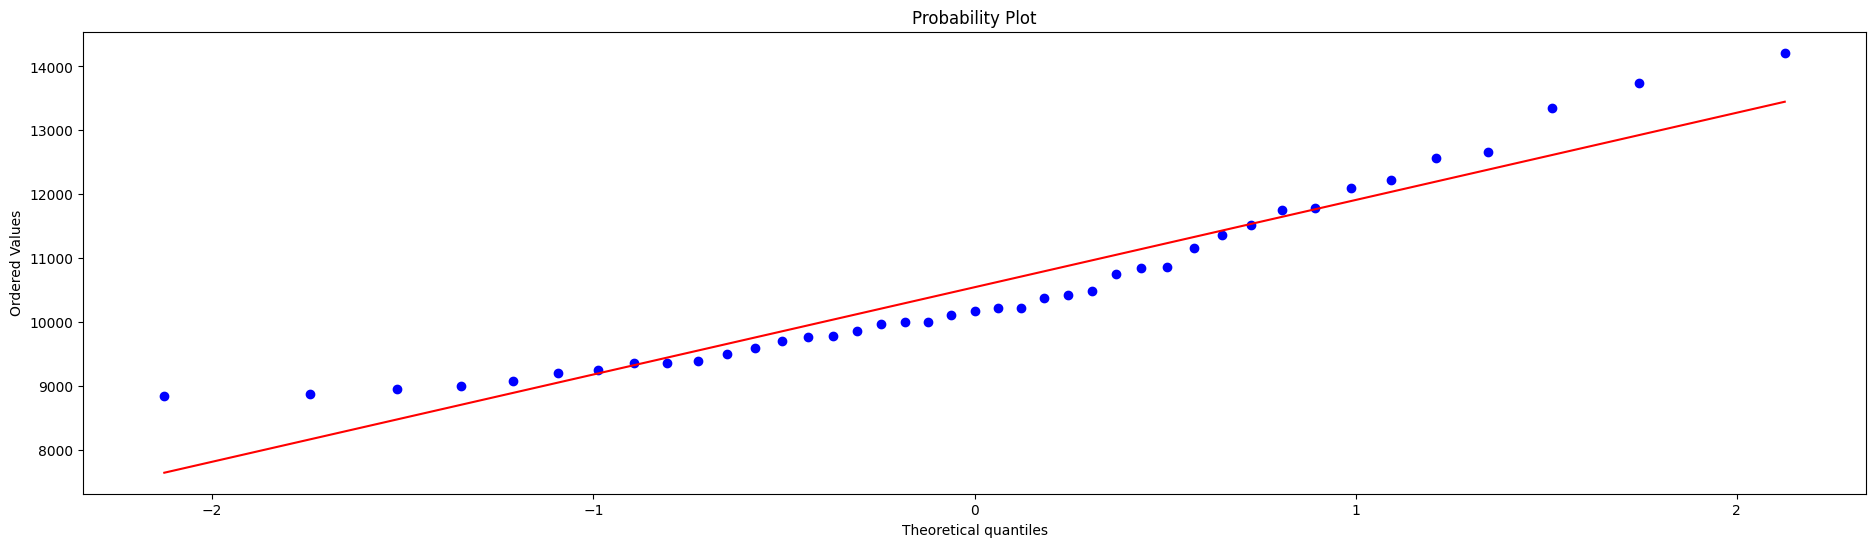

In [176]:
stats.probplot(serie1_pdseries, dist='norm', plot=plt)

In [177]:
test_value, p_value = stats.shapiro(serie1_pdseries)
print(f'Valor de teste: {test_value}')
print(f'P-value: {p_value}')

if p_value > 0.05:
    print('Distribuição normal')
else:
    print('Não é distribuição normal')

Valor de teste: 0.908749393788983
P-value: 0.0030363877964279533
Não é distribuição normal


O gráfico mostra que a distribuição não aparenta ser normal, mas o teste de shapiro-wilk confirma isso. Logo, há necessidade de realizar transformações.

In [178]:
serie1_pdseries_log = np.log(serie1_pdseries)
test_value_log, p_value_log = stats.shapiro(serie1_pdseries_log)
print(f'Valor de teste: {test_value_log}')
print(f'P-value: {p_value_log}')

if p_value_log > 0.05:
    print('Distribuição normal')
else:
    print('Não é distribuição normal')

Valor de teste: 0.9342121109395916
P-value: 0.01997408607452953
Não é distribuição normal


Melhorou, mas não é suficiente

In [179]:
serie1_pdseries_raiz = serie1_pdseries ** (1/3)
test_value_raiz, p_value_raiz = stats.shapiro(serie1_pdseries_raiz)
print(f'Valor de teste: {test_value_raiz}')
print(f'P-value: {p_value_raiz}')

if p_value_raiz > 0.05:
    print('Distribuição normal')
else:
    print('Não é distribuição normal')

Valor de teste: 0.9264378450933201
P-value: 0.011019671686685979
Não é distribuição normal


Foi pior que o anterior

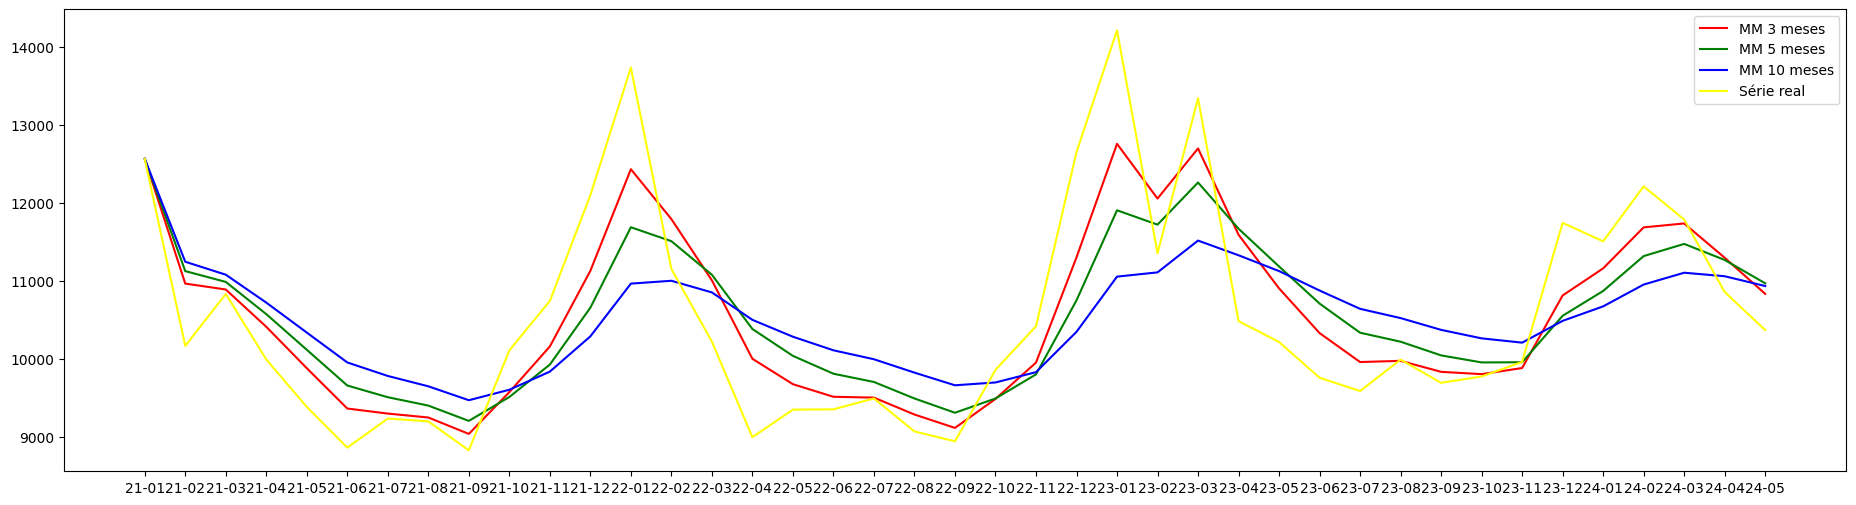

In [180]:
media_movel_curta = serie1_pdseries.ewm(span=3,).mean()
media_movel_mediana = serie1_pdseries.ewm(span=5).mean()
media_movel_longa = serie1_pdseries.ewm(span=10).mean()
plt.plot(media_movel_curta, color='red', label='MM 3 meses')
plt.plot(media_movel_mediana, color='green', label='MM 5 meses')
plt.plot(media_movel_longa, color='blue', label='MM 10 meses')
plt.plot(serie1_pdseries, color='yellow', label='Série real')
plt.legend(loc='best')

Considerando essa médias móveis, principalmente a média longa, é muitos visível sua estacionaridade. Contudo, isso não seria também uma forma de sazonalidade?
De qualquer forma, é possível identificar a tendência de crescimento explosivo nos meses de fim de ano ao observar a média curta

In [181]:
mes = 1
ano = 2021
index = pd.Series()

for i in range(0, 41):
    if mes < 10:
        index.loc[i] = f'{ano}-0{mes}-01'
    else:
        index[i] = f'{ano}-{mes}-01'

    if mes == 12:
        mes = 0
        ano += 1

    mes += 1

serie1_pdseries_log.index = index

display(serie1_pdseries_log)

2021-01-01    9.438822
2021-02-01    9.227112
2021-03-01    9.290608
2021-04-01    9.209953
2021-05-01    9.147095
2021-06-01    9.090001
2021-07-01    9.131178
2021-08-01    9.127218
2021-09-01    9.086156
2021-10-01    9.221493
2021-11-01    9.282341
2021-12-01    9.401065
2022-01-01    9.527749
2022-02-01    9.319692
2022-03-01    9.232508
2022-04-01    9.104957
2022-05-01    9.143472
2022-06-01    9.143843
2022-07-01    9.158671
2022-08-01    9.113114
2022-09-01    9.099090
2022-10-01    9.196437
2022-11-01    9.251595
2022-12-01    9.445646
2023-01-01    9.562018
2023-02-01    9.337531
2023-03-01    9.498747
2023-04-01    9.257927
2023-05-01    9.232088
2023-06-01    9.186185
2023-07-01    9.168647
2023-08-01    9.209712
2023-09-01    9.179559
2023-10-01    9.187880
2023-11-01    9.206763
2023-12-01    9.371331
2024-01-01    9.350990
2024-02-01    9.410364
2024-03-01    9.374920
2024-04-01    9.292855
2024-05-01    9.246966
dtype: float64

In [182]:
log_to_predict = serie1_pdseries_log[0:36]
log_to_predict

2021-01-01    9.438822
2021-02-01    9.227112
2021-03-01    9.290608
2021-04-01    9.209953
2021-05-01    9.147095
2021-06-01    9.090001
2021-07-01    9.131178
2021-08-01    9.127218
2021-09-01    9.086156
2021-10-01    9.221493
2021-11-01    9.282341
2021-12-01    9.401065
2022-01-01    9.527749
2022-02-01    9.319692
2022-03-01    9.232508
2022-04-01    9.104957
2022-05-01    9.143472
2022-06-01    9.143843
2022-07-01    9.158671
2022-08-01    9.113114
2022-09-01    9.099090
2022-10-01    9.196437
2022-11-01    9.251595
2022-12-01    9.445646
2023-01-01    9.562018
2023-02-01    9.337531
2023-03-01    9.498747
2023-04-01    9.257927
2023-05-01    9.232088
2023-06-01    9.186185
2023-07-01    9.168647
2023-08-01    9.209712
2023-09-01    9.179559
2023-10-01    9.187880
2023-11-01    9.206763
2023-12-01    9.371331
dtype: float64

In [183]:
ar_model = ARIMA(log_to_predict, order=(8, 0, 0))
resultado_ar = ar_model.fit()
print(resultado_ar.summary())

c:\Users\Max\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Max\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Max\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Max\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   36
Model:                 ARIMA(8, 0, 0)   Log Likelihood                  40.851
Date:                Thu, 05 Sep 2024   AIC                            -61.701
Time:                        12:26:17   BIC                            -45.866
Sample:                    01-01-2021   HQIC                           -56.175
                         - 12-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.2499      0.012    790.288      0.000       9.227       9.273
ar.L1          0.3288      0.189      1.744      0.081      -0.041       0.698
ar.L2          0.2657      0.230      1.158      0.2

AIC mais baixo (-61.701) em (8, 0, 0)

In [184]:
resid_ar = resultado_ar.resid
resid_ar.describe()

count    36.000000
mean      0.000107
std       0.081669
min      -0.137533
25%      -0.047924
50%      -0.000826
75%       0.046595
max       0.188878
dtype: float64

Média próxima de zero

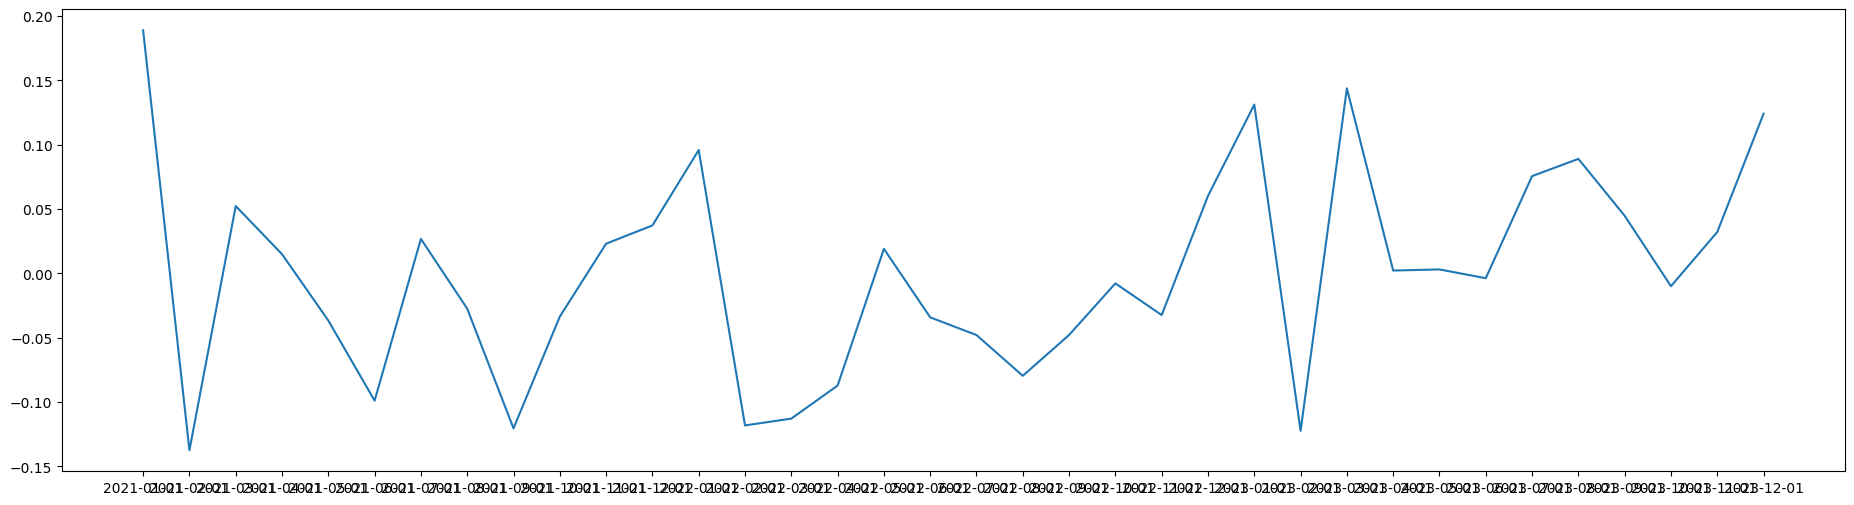

In [185]:
plt.plot(resid_ar)

((array([-2.07334886, -1.68217954, -1.44830429, -1.27437681, -1.13225357,
         -1.00993636, -0.90112151, -0.80205412, -0.71029762, -0.62416759,
         -0.54243995, -0.46418751, -0.38868208, -0.31533241, -0.24364313,
         -0.17318609, -0.10357945, -0.03447167,  0.03447167,  0.10357945,
          0.17318609,  0.24364313,  0.31533241,  0.38868208,  0.46418751,
          0.54243995,  0.62416759,  0.71029762,  0.80205412,  0.90112151,
          1.00993636,  1.13225357,  1.27437681,  1.44830429,  1.68217954,
          2.07334886]),
  array([-0.13753272, -0.12242192, -0.12047127, -0.11822278, -0.11293091,
         -0.09897715, -0.0872439 , -0.07965243, -0.04795437, -0.04791447,
         -0.03671208, -0.03422892, -0.03366138, -0.0324431 , -0.02748408,
         -0.01000409, -0.00783571, -0.00380562,  0.00215441,  0.00301134,
          0.01488636,  0.01903362,  0.02301983,  0.02673867,  0.03209858,
          0.03720278,  0.04470792,  0.05225468,  0.06016887,  0.07553295,
          0.08

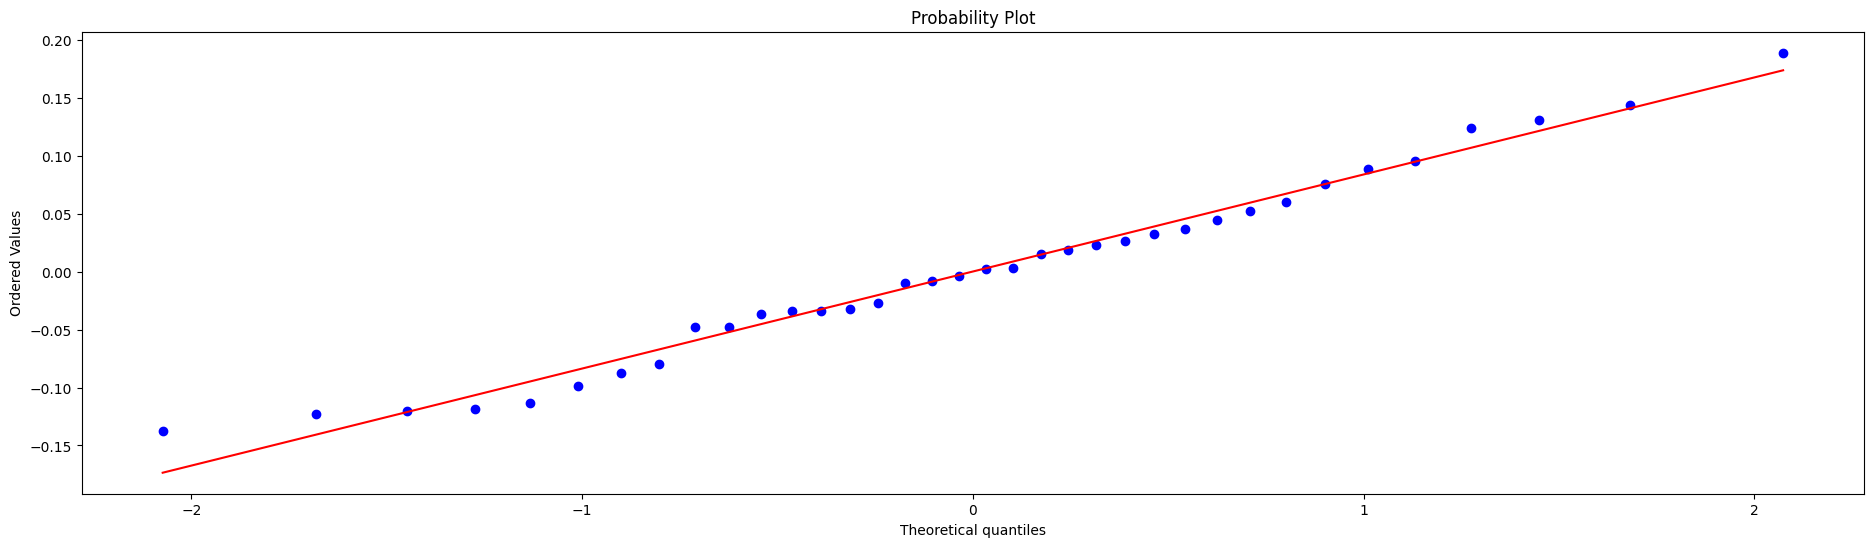

In [186]:
stats.probplot(resid_ar, dist='norm', plot=plt)

Forte indício de distribuição normal!

In [187]:
test_value_ar, p_value_ar = stats.shapiro(resid_ar)
print(f'Valor de teste: {test_value_ar}')
print(f'P-value: {p_value_ar}')

if p_value_ar > 0.05:
    print('Distribuição normal')
else:
    print('Não é distribuição normal')

Valor de teste: 0.9765859536022123
P-value: 0.6295016088978374
Distribuição normal


C:\Users\Max\AppData\Local\Temp\ipykernel_13924\2379349038.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(resid_ar)


<Axes: ylabel='Density'>

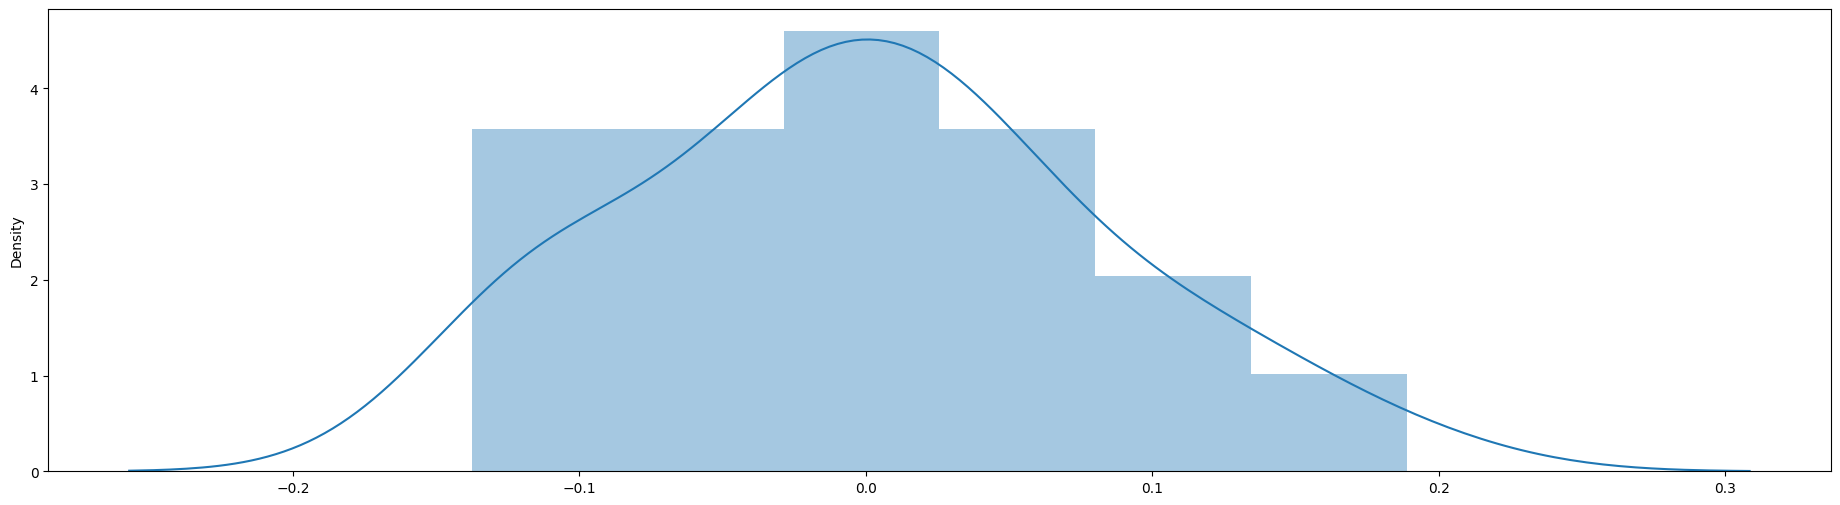

In [188]:
import seaborn as sns
sns.distplot(resid_ar)

Apesar do teste de shapiro-wilk e do probplot, a distribuição não está muito simétrica

In [189]:
predict = resultado_ar.predict(36, end=40)
predict

2024-01-01    9.335672
2024-02-01    9.374125
2024-03-01    9.327491
2024-04-01    9.252417
2024-05-01    9.242957
Freq: MS, Name: predicted_mean, dtype: float64

In [190]:
predict_sem_log = np.e**predict
predict_sem_log

2024-01-01    11335.243164
2024-02-01    11779.604274
2024-03-01    11242.891064
2024-04-01    10429.738871
2024-05-01    10331.540516
Freq: MS, Name: predicted_mean, dtype: float64

In [191]:
mes = 1
ano = 24
index_2 = pd.Series()

for i in range(0, 5):
    if mes < 10:
        index_2.loc[i] = f'{ano}-0{mes}'
    else:
        index_2[i] = f'{ano}-{mes}'

    if mes == 12:
        mes = 0
        ano += 1

    mes += 1

predict_sem_log.index = index_2

display(predict_sem_log)

24-01    11335.243164
24-02    11779.604274
24-03    11242.891064
24-04    10429.738871
24-05    10331.540516
Name: predicted_mean, dtype: float64

In [192]:
serie_total_ar = pd.concat([serie1_pdseries[0:36], predict_sem_log])
display(serie_total_ar)

21-01    12566.900700
21-02    10169.127800
21-03    10835.775500
21-04     9996.128600
21-05     9387.131600
21-06     8866.191800
21-07     9238.898400
21-08     9202.385900
21-09     8832.171300
21-10    10112.149200
21-11    10746.565300
21-12    12101.257900
22-01    13735.633900
22-02    11155.543500
22-03    10224.147600
22-04     8999.791900
22-05     9353.182500
22-06     9356.651600
22-07     9496.426300
22-08     9073.505200
22-09     8947.148300
22-10     9861.923900
22-11    10421.176600
22-12    12652.958400
23-01    14214.505900
23-02    11356.329200
23-03    13343.001500
23-04    10487.375100
23-05    10219.857200
23-06     9761.342300
23-07     9591.641300
23-08     9993.713500
23-09     9696.875200
23-10     9777.899800
23-11     9964.287100
23-12    11746.739300
24-01    11335.243164
24-02    11779.604274
24-03    11242.891064
24-04    10429.738871
24-05    10331.540516
dtype: float64

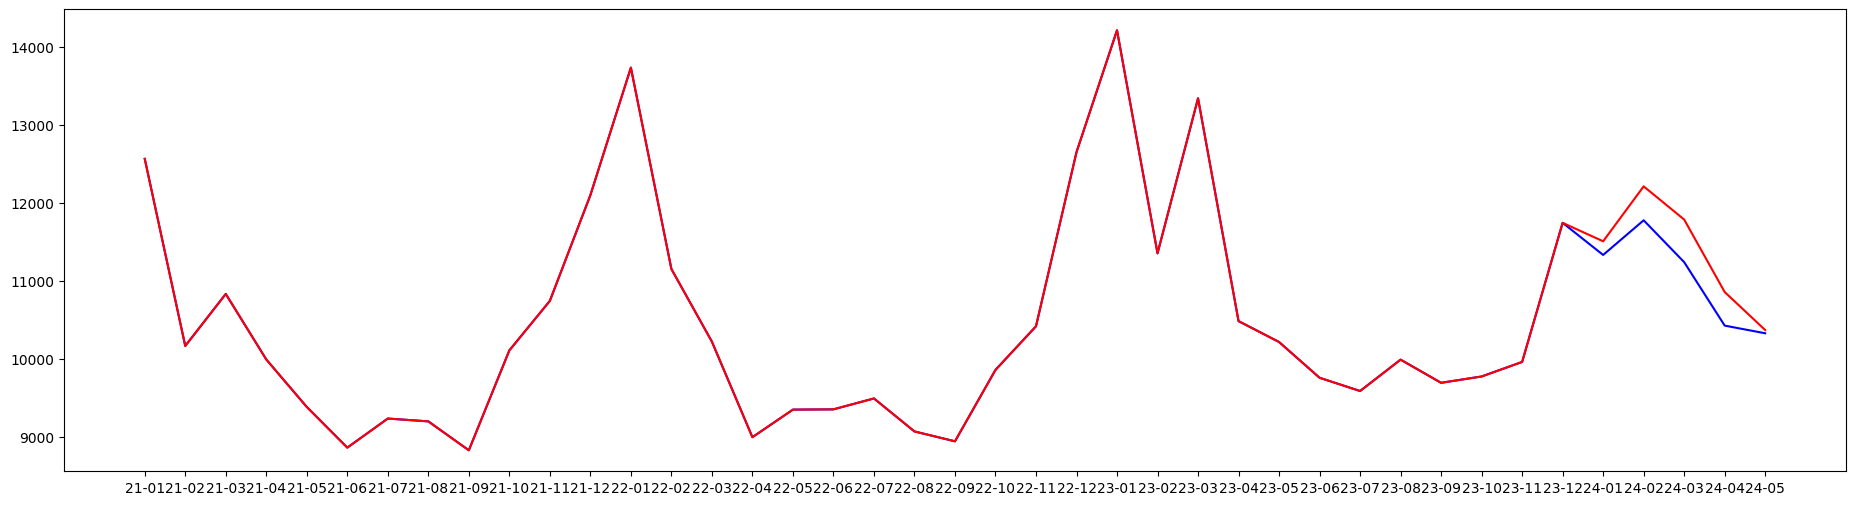

In [193]:
plt.plot(serie_total_ar, color='blue', label='Predict')
plt.plot(serie1_pdseries, color='red', label='Série real')

Houve um erro considerável ao utilizar o modelo AR, mas o formato permanece o mesmo

In [194]:
ma_model = ARIMA(log_to_predict, order=(0, 0, 3))
resultado_ma = ma_model.fit()
print(resultado_ma.summary())

c:\Users\Max\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Max\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Max\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   36
Model:                 ARIMA(0, 0, 3)   Log Likelihood                  35.169
Date:                Thu, 05 Sep 2024   AIC                            -60.338
Time:                        12:26:22   BIC                            -52.421
Sample:                    01-01-2021   HQIC                           -57.575
                         - 12-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.2585      0.046    202.676      0.000       9.169       9.348
ma.L1          0.6230      0.158      3.938      0.000       0.313       0.933
ma.L2          0.7430      0.210      3.543      0.0

Melhor AIC (-60.338) em (0, 0, 3)

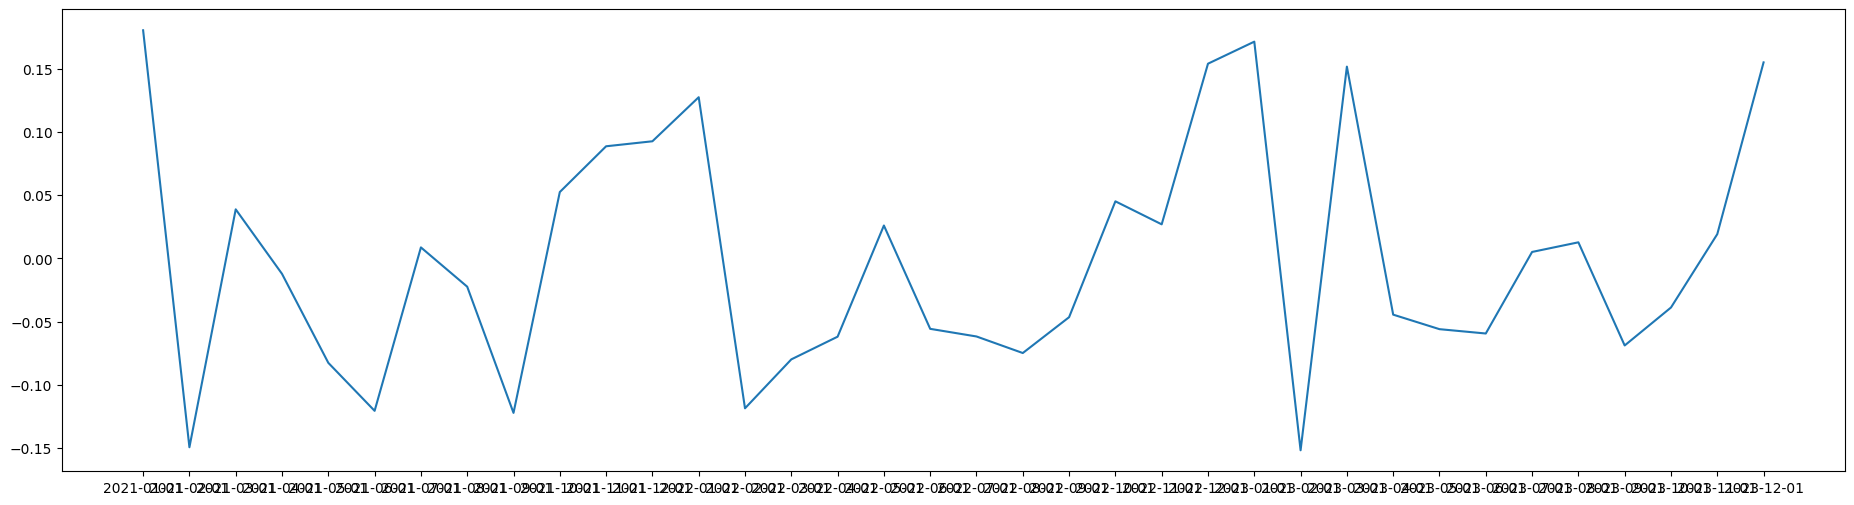

In [195]:
residuos_ma = resultado_ma.resid
plt.plot(residuos_ma)

In [196]:
residuos_ma.describe()

count    36.000000
mean     -0.002067
std       0.094039
min      -0.151800
25%      -0.063726
50%      -0.017381
75%       0.046879
max       0.180287
dtype: float64

Média próxima de zero indica distribuição normal

In [197]:
test_value_ma, p_value_ma = stats.shapiro(residuos_ma)
print(f'Valor de teste: {test_value_ma}')
print(f'P-value: {p_value_ma}')

if p_value_ma > 0.05:
    print('Distribuição normal')
else:
    print('Não é distribuição normal')

Valor de teste: 0.9463035901087737
P-value: 0.08000394594727801
Distribuição normal


((array([-2.07334886, -1.68217954, -1.44830429, -1.27437681, -1.13225357,
         -1.00993636, -0.90112151, -0.80205412, -0.71029762, -0.62416759,
         -0.54243995, -0.46418751, -0.38868208, -0.31533241, -0.24364313,
         -0.17318609, -0.10357945, -0.03447167,  0.03447167,  0.10357945,
          0.17318609,  0.24364313,  0.31533241,  0.38868208,  0.46418751,
          0.54243995,  0.62416759,  0.71029762,  0.80205412,  0.90112151,
          1.00993636,  1.13225357,  1.27437681,  1.44830429,  1.68217954,
          2.07334886]),
  array([-0.15180038, -0.14939844, -0.12223591, -0.12061409, -0.11861314,
         -0.0826599 , -0.07992958, -0.0749079 , -0.06893063, -0.0619914 ,
         -0.0618176 , -0.05946858, -0.0560431 , -0.055783  , -0.04657434,
         -0.04455694, -0.03891896, -0.02245344, -0.01230811,  0.00501377,
          0.00861539,  0.01263003,  0.0190939 ,  0.02592398,  0.02684452,
          0.03870615,  0.04504664,  0.05237614,  0.08856838,  0.09252171,
          0.12

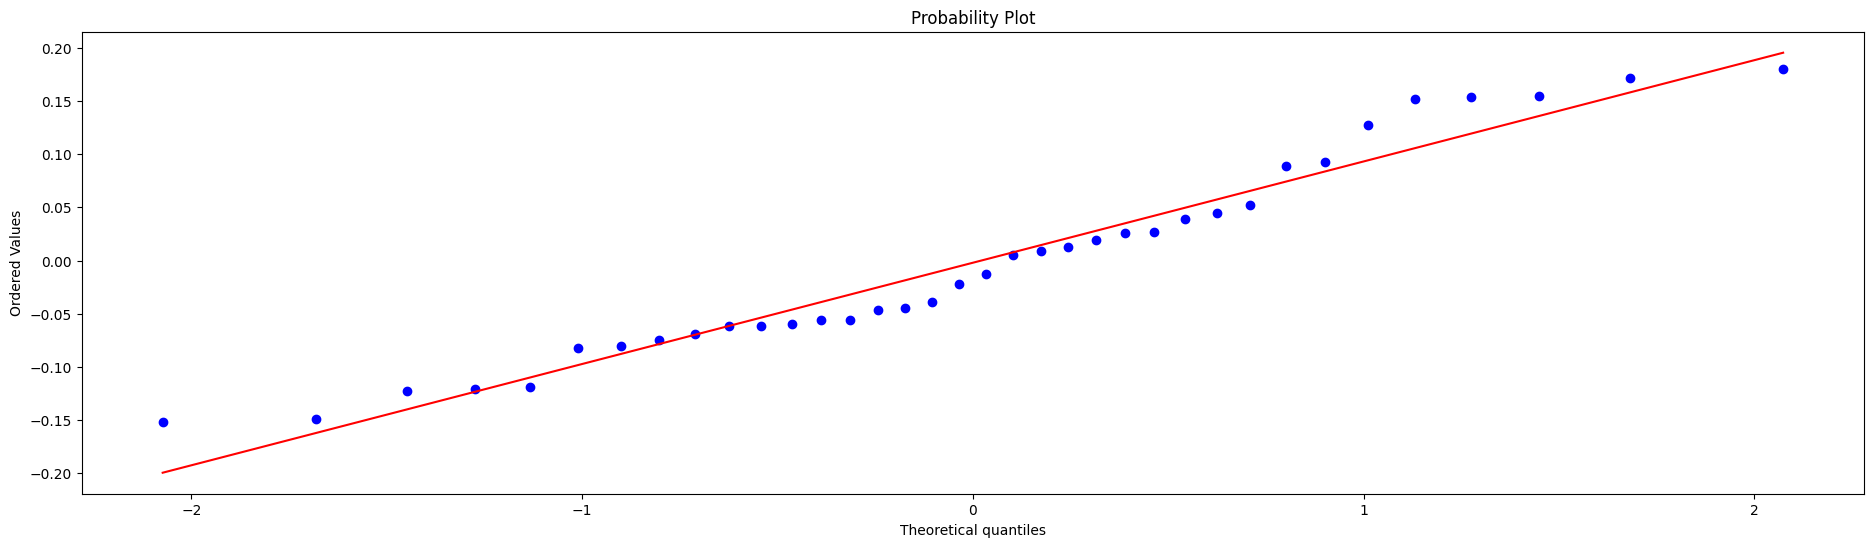

In [198]:
stats.probplot(residuos_ma, dist='norm', plot=plt)

C:\Users\Max\AppData\Local\Temp\ipykernel_13924\3040304180.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuos_ma)


<Axes: ylabel='Density'>

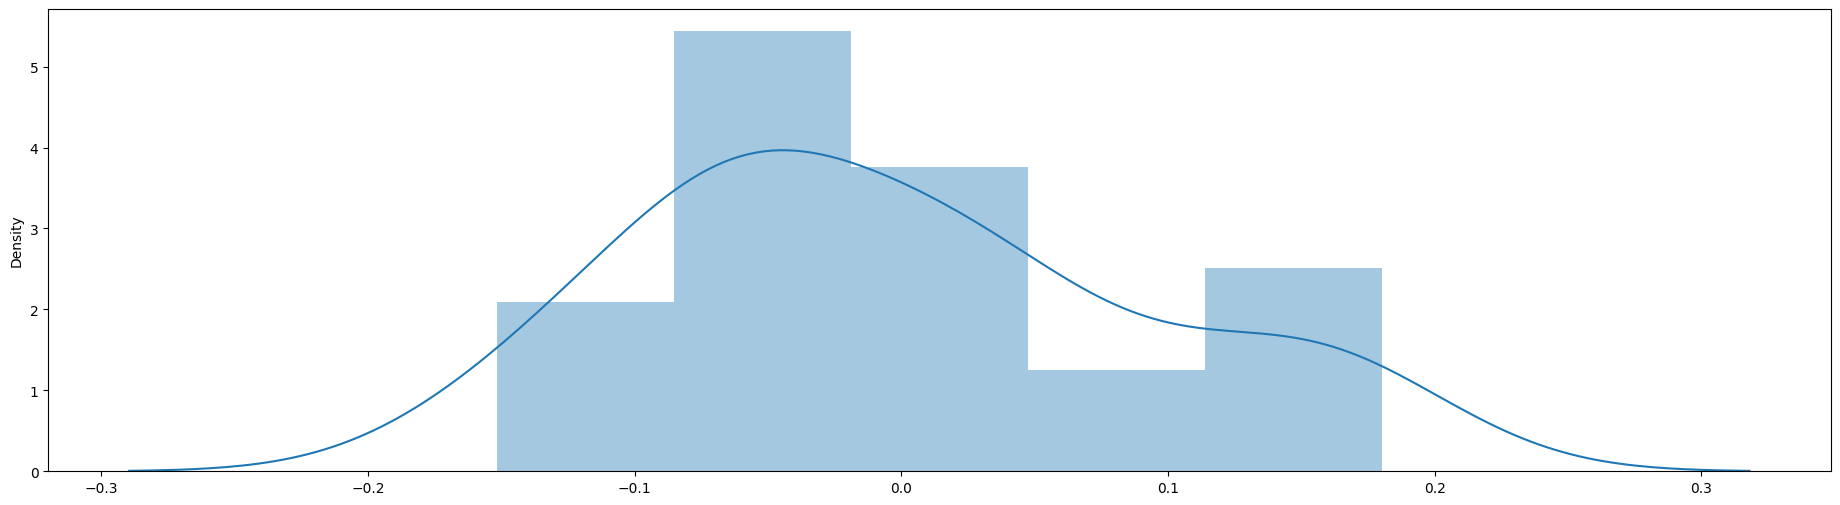

In [199]:
sns.distplot(residuos_ma)

Graficamente, os resíduos estão muito piores do que no modelo ar

In [200]:
predict = resultado_ma.predict(36, end=40)
predict

2024-01-01    9.355062
2024-02-01    9.380571
2024-03-01    9.314898
2024-04-01    9.258535
2024-05-01    9.258535
Freq: MS, Name: predicted_mean, dtype: float64

In [201]:
predict_sem_log = np.e**predict
predict_sem_log

2024-01-01    11557.180472
2024-02-01    11855.781515
2024-03-01    11102.189167
2024-04-01    10493.744046
2024-05-01    10493.744046
Freq: MS, Name: predicted_mean, dtype: float64

In [202]:
mes = 1
ano = 24
index_2 = pd.Series()

for i in range(0, 5):
    if mes < 10:
        index_2.loc[i] = f'{ano}-0{mes}'
    else:
        index_2[i] = f'{ano}-{mes}'

    if mes == 12:
        mes = 0
        ano += 1

    mes += 1

predict_sem_log.index = index_2

display(predict_sem_log)

24-01    11557.180472
24-02    11855.781515
24-03    11102.189167
24-04    10493.744046
24-05    10493.744046
Name: predicted_mean, dtype: float64

In [203]:
serie_total_ma = pd.concat([serie1_pdseries[0:36], predict_sem_log])
display(serie_total_ma)

21-01    12566.900700
21-02    10169.127800
21-03    10835.775500
21-04     9996.128600
21-05     9387.131600
21-06     8866.191800
21-07     9238.898400
21-08     9202.385900
21-09     8832.171300
21-10    10112.149200
21-11    10746.565300
21-12    12101.257900
22-01    13735.633900
22-02    11155.543500
22-03    10224.147600
22-04     8999.791900
22-05     9353.182500
22-06     9356.651600
22-07     9496.426300
22-08     9073.505200
22-09     8947.148300
22-10     9861.923900
22-11    10421.176600
22-12    12652.958400
23-01    14214.505900
23-02    11356.329200
23-03    13343.001500
23-04    10487.375100
23-05    10219.857200
23-06     9761.342300
23-07     9591.641300
23-08     9993.713500
23-09     9696.875200
23-10     9777.899800
23-11     9964.287100
23-12    11746.739300
24-01    11557.180472
24-02    11855.781515
24-03    11102.189167
24-04    10493.744046
24-05    10493.744046
dtype: float64

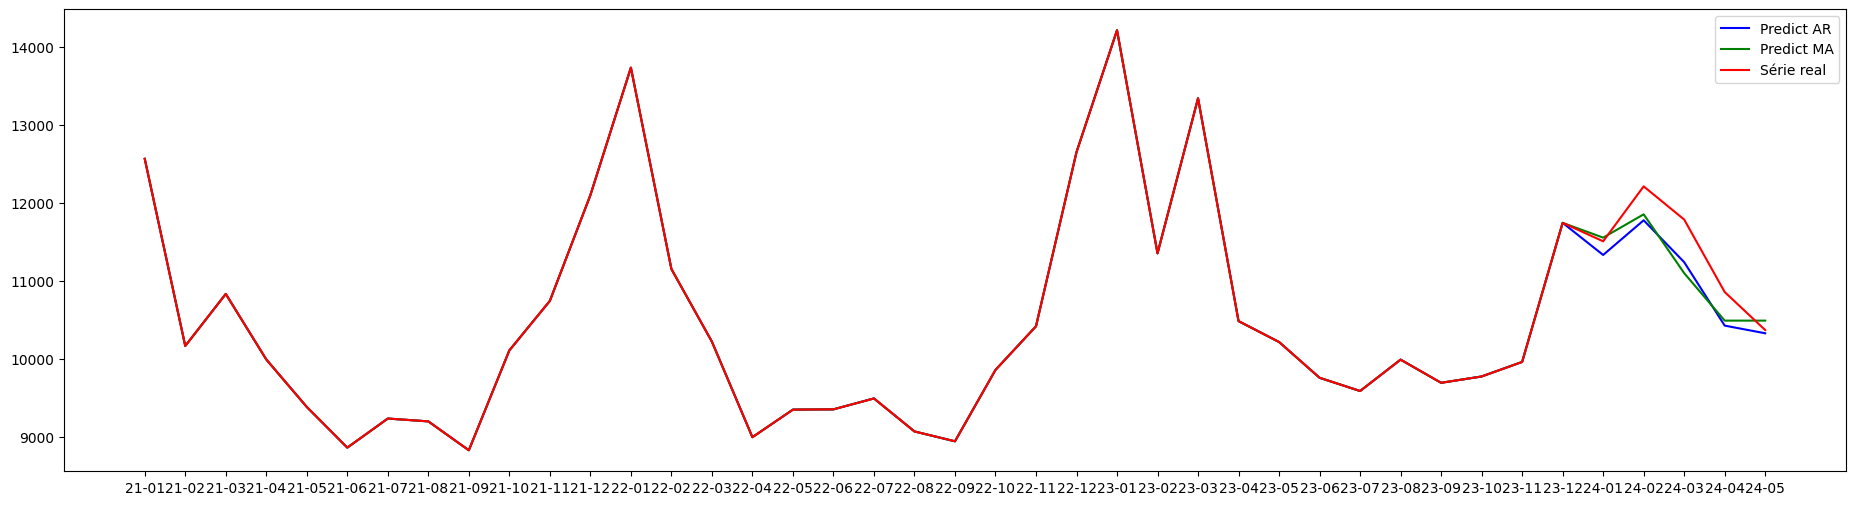

In [204]:
plt.plot(serie_total_ar, color='blue', label='Predict AR')
plt.plot(serie_total_ma, color='green', label='Predict MA')
plt.plot(serie1_pdseries, color='red', label='Série real')
plt.legend(loc='best')

Resultado mais preciso no início, mas extremamente semelhante depois

In [205]:
arma_model = ARIMA(log_to_predict, order=(8, 0, 4))
resultado_arma = arma_model.fit()
print(resultado_arma.summary())

c:\Users\Max\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Max\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Max\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Max\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Max\AppDat

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   36
Model:                 ARIMA(8, 0, 4)   Log Likelihood                  45.211
Date:                Thu, 05 Sep 2024   AIC                            -62.421
Time:                        12:26:38   BIC                            -40.252
Sample:                    01-01-2021   HQIC                           -54.684
                         - 12-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.2498      0.013    719.144      0.000       9.225       9.275
ar.L1          0.0254      0.377      0.067      0.946      -0.713       0.764
ar.L2          0.5030      0.332      1.516      0.1

Melhor AIC (-62.421) em (8, 0, 4)

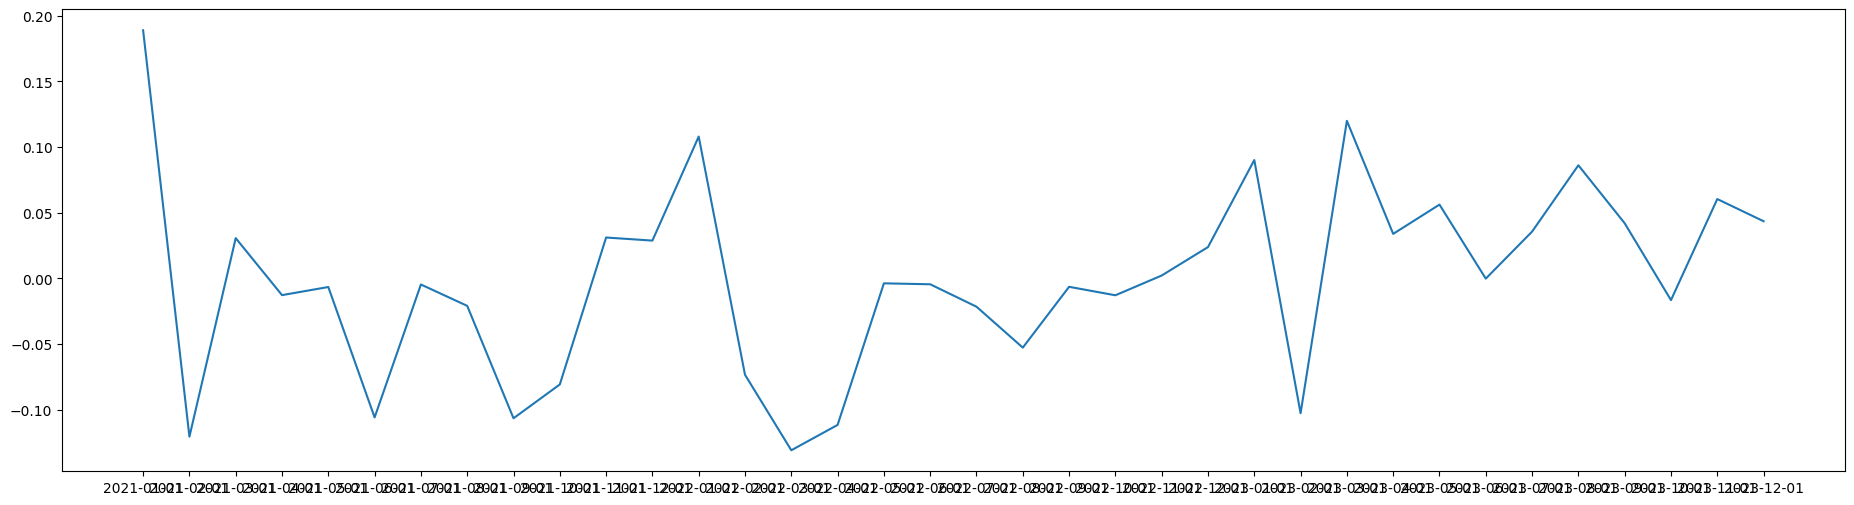

In [206]:
residuos_arma = resultado_arma.resid
plt.plot(residuos_arma)

A média zero está mais visível nesses resíduos do que nos anteriores

In [207]:
residuos_arma.describe()

count    36.000000
mean     -0.000360
std       0.073100
min      -0.130858
25%      -0.029310
50%      -0.004086
75%       0.037256
max       0.188973
dtype: float64

Não foi a média mais próxima de zero até agora, mas não foi a pior

((array([-2.07334886, -1.68217954, -1.44830429, -1.27437681, -1.13225357,
         -1.00993636, -0.90112151, -0.80205412, -0.71029762, -0.62416759,
         -0.54243995, -0.46418751, -0.38868208, -0.31533241, -0.24364313,
         -0.17318609, -0.10357945, -0.03447167,  0.03447167,  0.10357945,
          0.17318609,  0.24364313,  0.31533241,  0.38868208,  0.46418751,
          0.54243995,  0.62416759,  0.71029762,  0.80205412,  0.90112151,
          1.00993636,  1.13225357,  1.27437681,  1.44830429,  1.68217954,
          2.07334886]),
  array([-1.30857760e-01, -1.20503735e-01, -1.11544796e-01, -1.06487975e-01,
         -1.05839416e-01, -1.02626628e-01, -8.07371035e-02, -7.33424614e-02,
         -5.26827303e-02, -2.15186254e-02, -2.08842470e-02, -1.65133978e-02,
         -1.28259149e-02, -1.27102332e-02, -6.52227569e-03, -6.37190480e-03,
         -4.61957080e-03, -4.44866377e-03, -3.72357675e-03, -1.51518808e-04,
          2.21799362e-03,  2.38786985e-02,  2.88160866e-02,  3.06967837e-

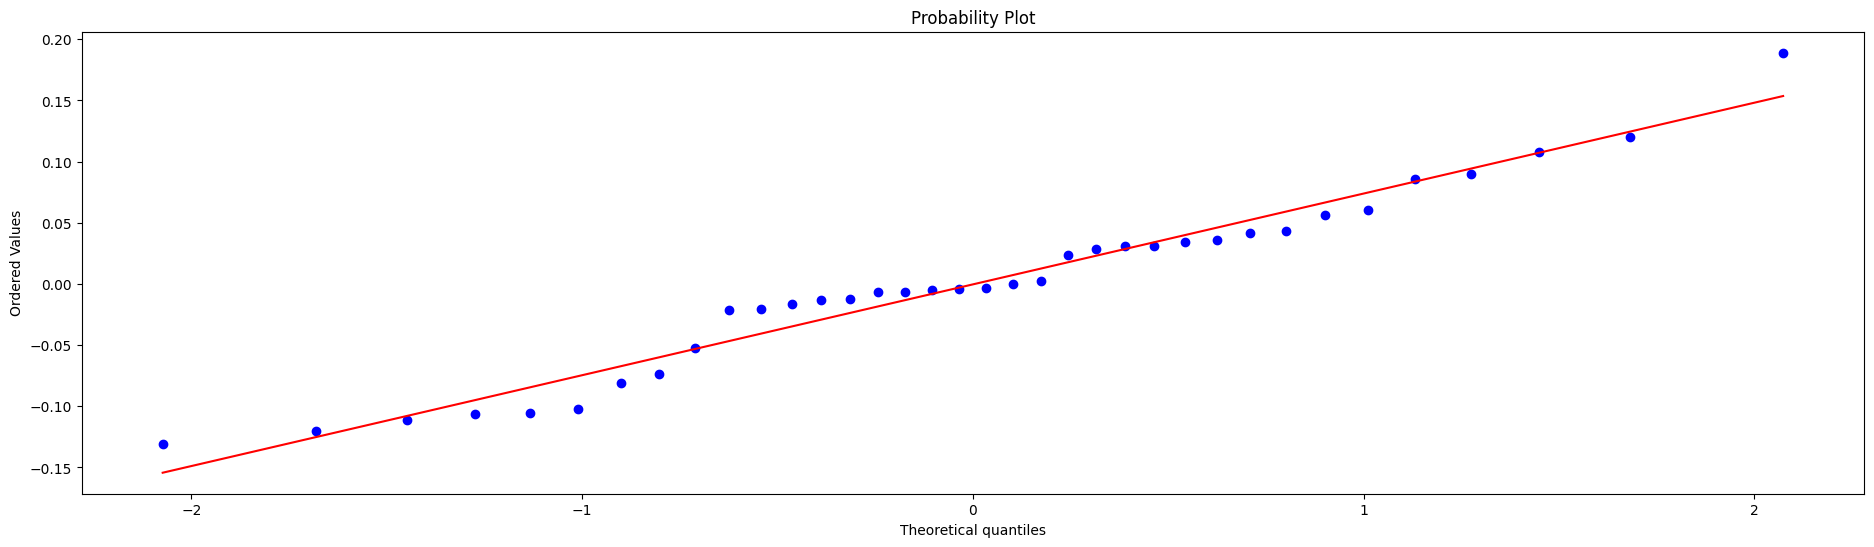

In [208]:
stats.probplot(residuos_arma, dist='norm', plot=plt)

C:\Users\Max\AppData\Local\Temp\ipykernel_13924\2760914408.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuos_arma)


<Axes: ylabel='Density'>

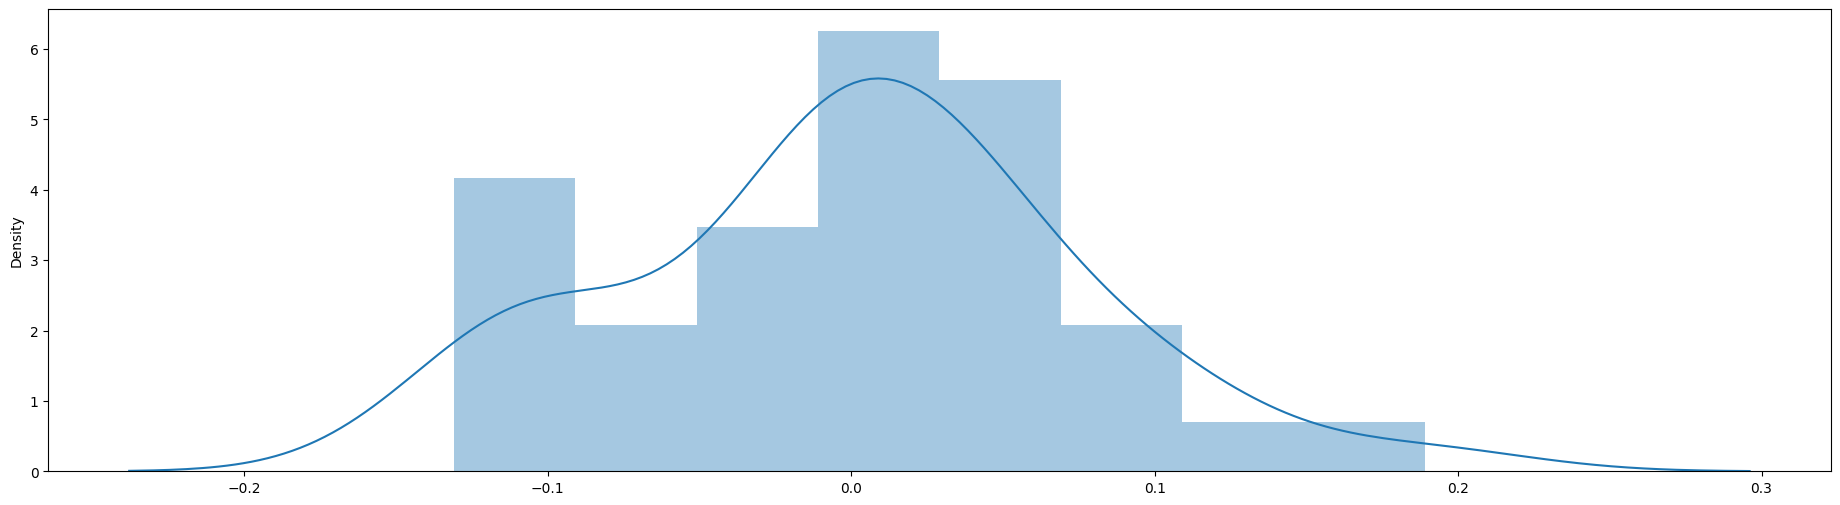

In [209]:
sns.distplot(residuos_arma)

Acredito que, graficamente, esse foi o melhor resultado

In [210]:
test_value_arma, p_value_arma = stats.shapiro(residuos_arma)
print(f'Valor de teste: {test_value_arma}')
print(f'P-value: {p_value_arma}')

if p_value_arma > 0.05:
    print('Distribuição normal')
else:
    print('Não é distribuição normal')

Valor de teste: 0.9643638229035888
P-value: 0.29193072219838734
Distribuição normal


Mas esse p-value foi disparado o melhor

In [211]:
predict = resultado_arma.predict(36, end=40)
predict

2024-01-01    9.326653
2024-02-01    9.401168
2024-03-01    9.419679
2024-04-01    9.235908
2024-05-01    9.286051
Freq: MS, Name: predicted_mean, dtype: float64

In [212]:
predict_sem_log = np.e**predict
predict_sem_log

2024-01-01    11233.475481
2024-02-01    12102.512771
2024-03-01    12328.618392
2024-04-01    10258.971652
2024-05-01    10786.507227
Freq: MS, Name: predicted_mean, dtype: float64

In [213]:
mes = 1
ano = 24
index_2 = pd.Series()

for i in range(0, 5):
    if mes < 10:
        index_2.loc[i] = f'{ano}-0{mes}'
    else:
        index_2[i] = f'{ano}-{mes}'

    if mes == 12:
        mes = 0
        ano += 1

    mes += 1

predict_sem_log.index = index_2

display(predict_sem_log)

24-01    11233.475481
24-02    12102.512771
24-03    12328.618392
24-04    10258.971652
24-05    10786.507227
Name: predicted_mean, dtype: float64

In [214]:
serie_total_arma = pd.concat([serie1_pdseries[0:36], predict_sem_log])
display(serie_total_arma)

21-01    12566.900700
21-02    10169.127800
21-03    10835.775500
21-04     9996.128600
21-05     9387.131600
21-06     8866.191800
21-07     9238.898400
21-08     9202.385900
21-09     8832.171300
21-10    10112.149200
21-11    10746.565300
21-12    12101.257900
22-01    13735.633900
22-02    11155.543500
22-03    10224.147600
22-04     8999.791900
22-05     9353.182500
22-06     9356.651600
22-07     9496.426300
22-08     9073.505200
22-09     8947.148300
22-10     9861.923900
22-11    10421.176600
22-12    12652.958400
23-01    14214.505900
23-02    11356.329200
23-03    13343.001500
23-04    10487.375100
23-05    10219.857200
23-06     9761.342300
23-07     9591.641300
23-08     9993.713500
23-09     9696.875200
23-10     9777.899800
23-11     9964.287100
23-12    11746.739300
24-01    11233.475481
24-02    12102.512771
24-03    12328.618392
24-04    10258.971652
24-05    10786.507227
dtype: float64

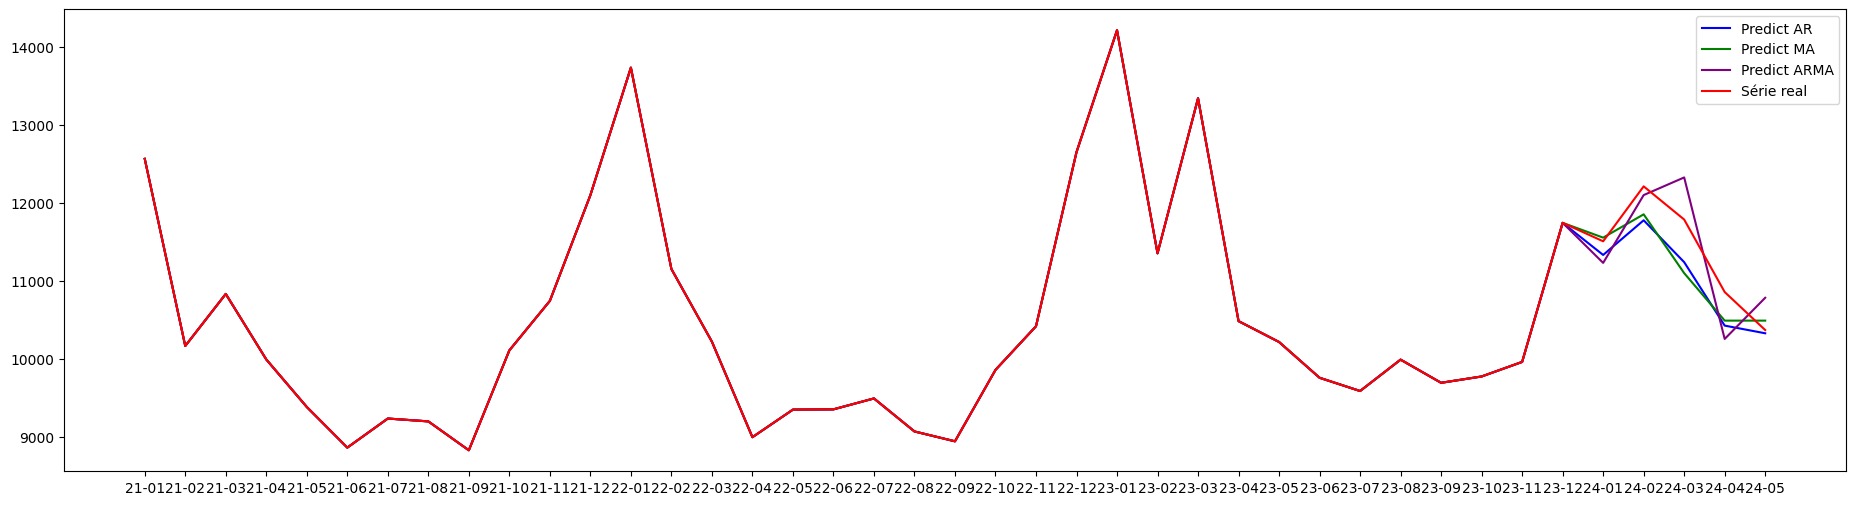

In [215]:
plt.plot(serie_total_ar, color='blue', label='Predict AR')
plt.plot(serie_total_ma, color='green', label='Predict MA')
plt.plot(serie_total_arma, color='purple', label='Predict ARMA')
plt.plot(serie1_pdseries, color='red', label='Série real')
plt.legend(loc='best')

In [216]:
auto_arima_model = auto_arima(log_to_predict, trace=True, stepwise=False, seasonal=False, max_p=10, max_q=10, start_p=0, start_q=0)

 ARIMA(0,0,0)(0,0,0)[0]             : AIC=264.297, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.93 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=1.77 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=inf, Time=5.58 sec
 ARIMA(0,0,4)(0,0,0)[0]             : AIC=inf, Time=8.82 sec
 ARIMA(0,0,5)(0,0,0)[0]             : AIC=inf, Time=7.50 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-42.429, Time=1.95 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-43.410, Time=5.04 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=inf, Time=5.56 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=-45.059, Time=6.66 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=3.43 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-40.392, Time=6.82 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-38.569, Time=6.30 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=-39.182, Time=6.76 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=5.17 

In [217]:
auto_arima_model = auto_arima(log_to_predict, trace=True, stepwise=False, seasonal=True, max_p=10, max_q=10, max_P=4, max_Q=4, start_p=0, start_q=0, start_P=0, start_Q=0)

 ARIMA(0,0,0)(0,0,0)[1] intercept   : AIC=-42.636, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[1] intercept   : AIC=-51.956, Time=0.93 sec
 ARIMA(0,0,2)(0,0,0)[1] intercept   : AIC=-58.961, Time=1.59 sec
 ARIMA(0,0,3)(0,0,0)[1] intercept   : AIC=-60.338, Time=2.89 sec
 ARIMA(0,0,4)(0,0,0)[1] intercept   : AIC=-58.340, Time=4.33 sec
 ARIMA(0,0,5)(0,0,0)[1] intercept   : AIC=-56.477, Time=4.18 sec
 ARIMA(1,0,0)(0,0,0)[1] intercept   : AIC=-57.566, Time=0.07 sec
 ARIMA(1,0,1)(0,0,0)[1] intercept   : AIC=-55.608, Time=11.74 sec
 ARIMA(1,0,2)(0,0,0)[1] intercept   : AIC=-59.569, Time=5.67 sec
 ARIMA(1,0,3)(0,0,0)[1] intercept   : AIC=-58.338, Time=5.06 sec
 ARIMA(1,0,4)(0,0,0)[1] intercept   : AIC=-59.182, Time=6.62 sec
 ARIMA(2,0,0)(0,0,0)[1] intercept   : AIC=-55.636, Time=1.29 sec
 ARIMA(2,0,1)(0,0,0)[1] intercept   : AIC=-53.713, Time=5.87 sec
 ARIMA(2,0,2)(0,0,0)[1] intercept   : AIC=-58.488, Time=7.05 sec
 ARIMA(2,0,3)(0,0,0)[1] intercept   : AIC=-55.752, Time=8.99 sec
 ARIMA(3,0,0)(0,0,0)[1] 

In [218]:
resultado_auto = auto_arima_model.fit(log_to_predict)


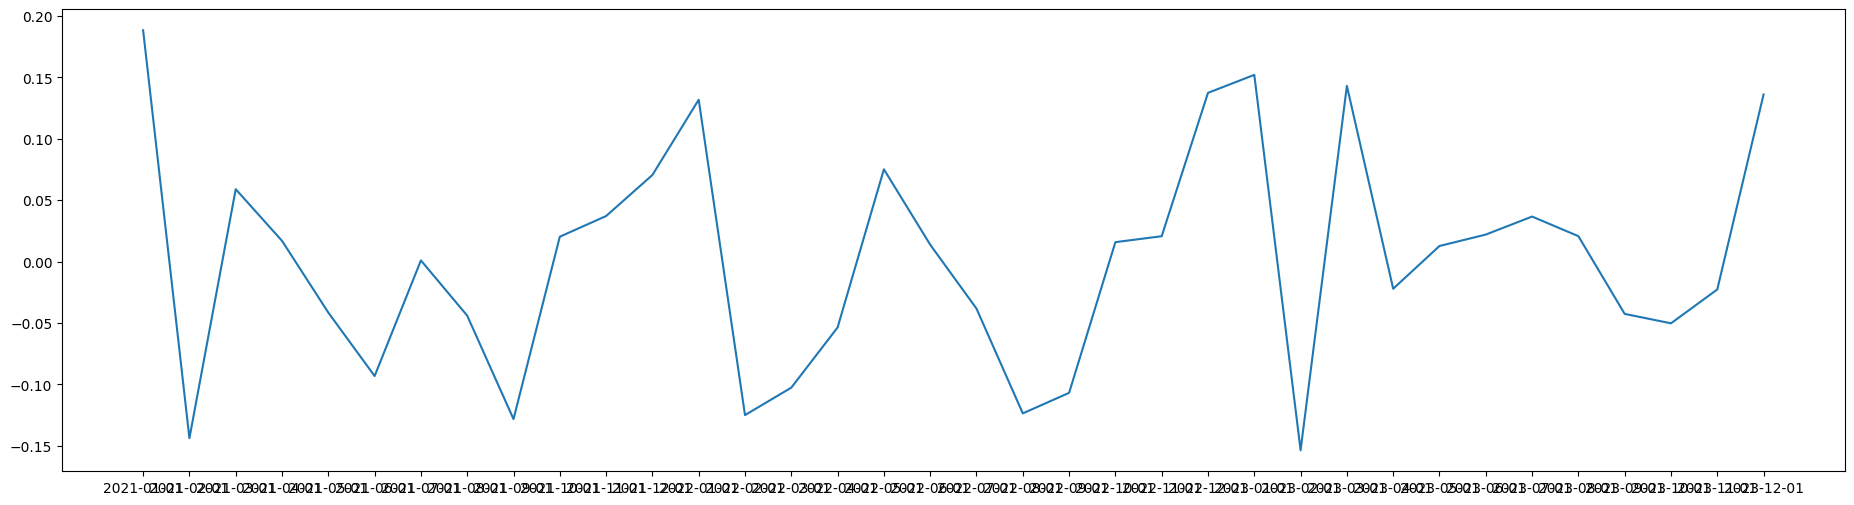

In [219]:
residuos_auto = resultado_auto.resid
plt.plot(residuos_auto())

((array([-2.07334886, -1.68217954, -1.44830429, -1.27437681, -1.13225357,
         -1.00993636, -0.90112151, -0.80205412, -0.71029762, -0.62416759,
         -0.54243995, -0.46418751, -0.38868208, -0.31533241, -0.24364313,
         -0.17318609, -0.10357945, -0.03447167,  0.03447167,  0.10357945,
          0.17318609,  0.24364313,  0.31533241,  0.38868208,  0.46418751,
          0.54243995,  0.62416759,  0.71029762,  0.80205412,  0.90112151,
          1.00993636,  1.13225357,  1.27437681,  1.44830429,  1.68217954,
          2.07334886]),
  array([-0.15353501, -0.14366947, -0.12814359, -0.12489989, -0.12351051,
         -0.10679653, -0.10255947, -0.09308821, -0.05356471, -0.05021064,
         -0.0439773 , -0.0425336 , -0.04146861, -0.03823877, -0.02266174,
         -0.02205621,  0.00098927,  0.01271952,  0.01379082,  0.01585401,
          0.01692375,  0.02028898,  0.02067937,  0.02072259,  0.02202504,
          0.0366735 ,  0.03709676,  0.05894795,  0.07051713,  0.07514585,
          0.13

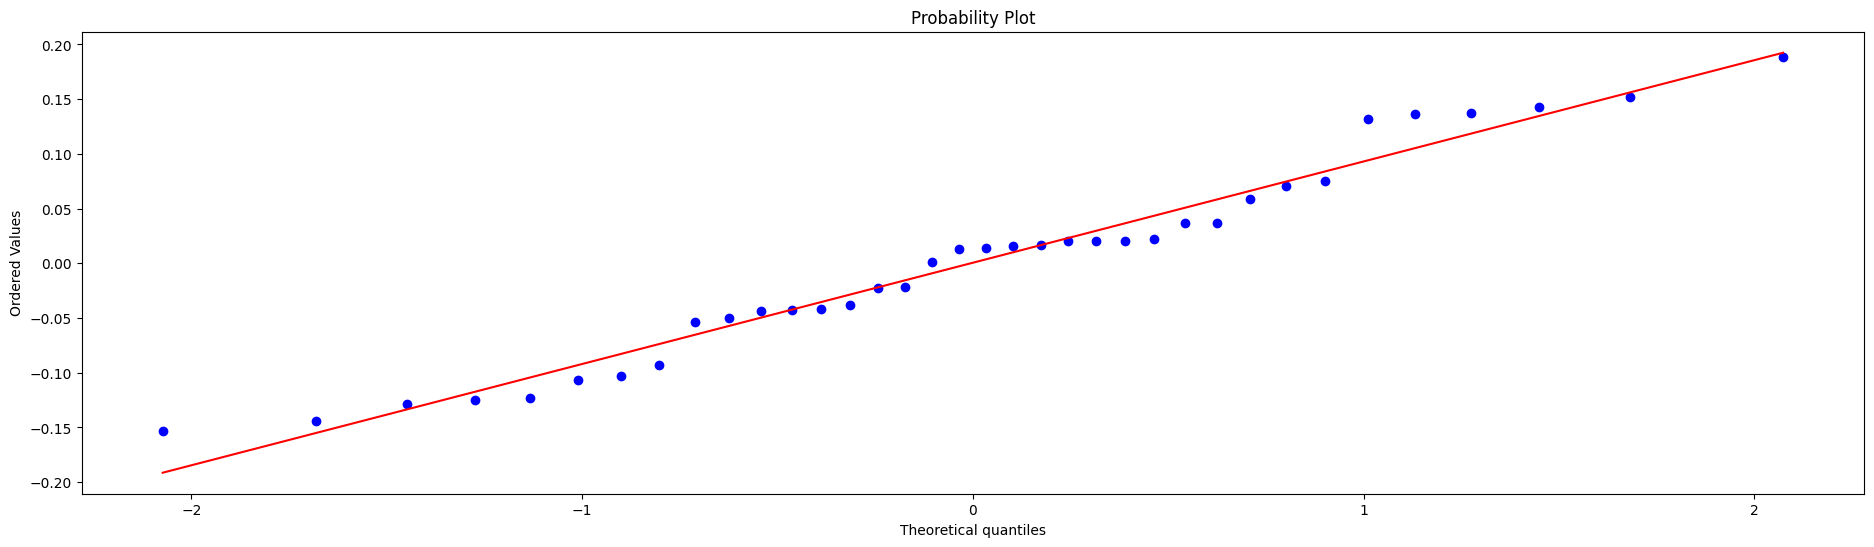

In [220]:
stats.probplot(residuos_auto(), dist='norm', plot=plt)

C:\Users\Max\AppData\Local\Temp\ipykernel_13924\1542197477.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuos_auto())


<Axes: ylabel='Density'>

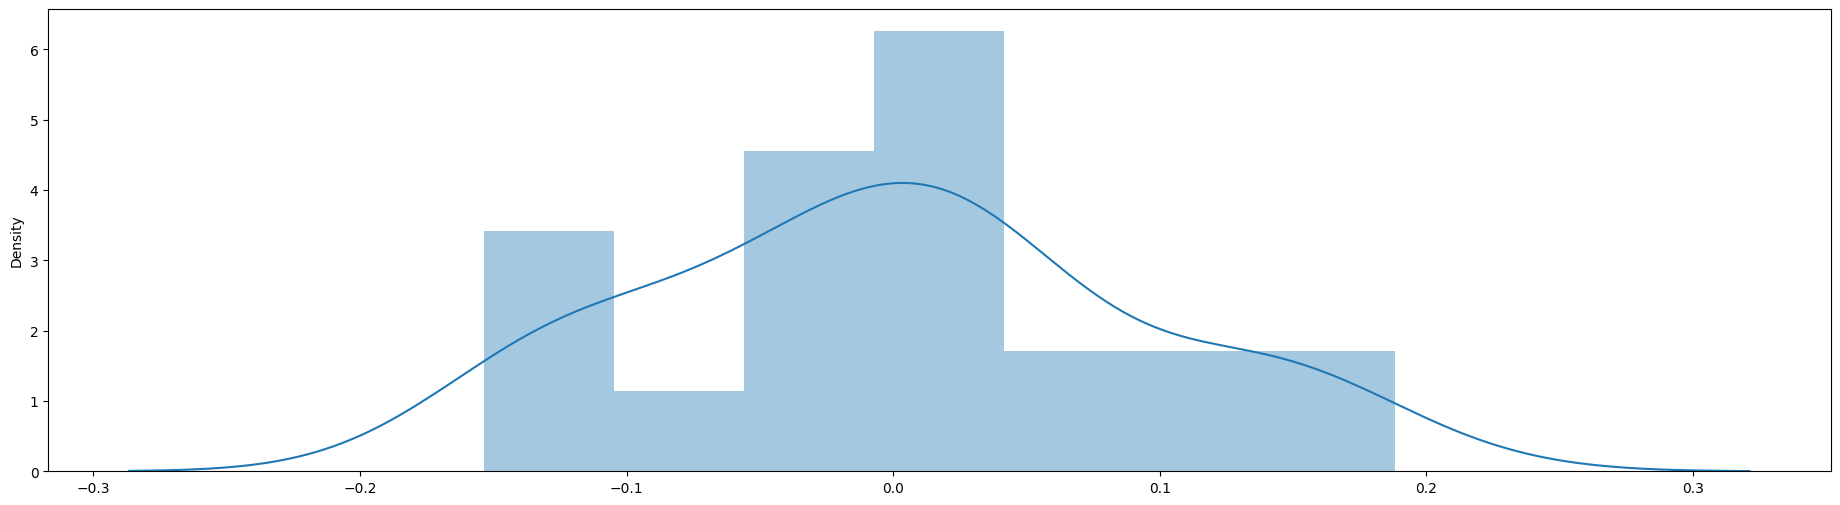

In [221]:
sns.distplot(residuos_auto())

Tá mais pra um morro do que pra um sino

In [223]:
test_value_auto, p_value_auto = stats.shapiro(residuos_auto())
print(f'Valor de teste: {test_value_auto}')
print(f'P-value: {p_value_auto}')

if p_value_auto > 0.05:
    print('Distribuição normal')
else:
    print('Não é distribuição normal')

Valor de teste: 0.9621096565363279
P-value: 0.2495182451753747
Distribuição normal


In [224]:
predict = resultado_auto.predict(n_periods=5)
predict

2024-01-01    9.333725
2024-02-01    9.361566
2024-03-01    9.323189
2024-04-01    9.268774
2024-05-01    9.234254
Freq: MS, dtype: float64

In [225]:
predict_sem_log = np.e**predict
predict_sem_log

2024-01-01    11313.192696
2024-02-01    11632.587680
2024-03-01    11194.629407
2024-04-01    10601.744223
2024-05-01    10242.021636
Freq: MS, dtype: float64

In [226]:
mes = 1
ano = 24
index_2 = pd.Series()

for i in range(0, 5):
    if mes < 10:
        index_2.loc[i] = f'{ano}-0{mes}'
    else:
        index_2[i] = f'{ano}-{mes}'

    if mes == 12:
        mes = 0
        ano += 1

    mes += 1

predict_sem_log.index = index_2

display(predict_sem_log)

24-01    11313.192696
24-02    11632.587680
24-03    11194.629407
24-04    10601.744223
24-05    10242.021636
dtype: float64

In [227]:
serie_total_auto = pd.concat([serie1_pdseries[0:36], predict_sem_log])
display(serie_total_auto)

21-01    12566.900700
21-02    10169.127800
21-03    10835.775500
21-04     9996.128600
21-05     9387.131600
21-06     8866.191800
21-07     9238.898400
21-08     9202.385900
21-09     8832.171300
21-10    10112.149200
21-11    10746.565300
21-12    12101.257900
22-01    13735.633900
22-02    11155.543500
22-03    10224.147600
22-04     8999.791900
22-05     9353.182500
22-06     9356.651600
22-07     9496.426300
22-08     9073.505200
22-09     8947.148300
22-10     9861.923900
22-11    10421.176600
22-12    12652.958400
23-01    14214.505900
23-02    11356.329200
23-03    13343.001500
23-04    10487.375100
23-05    10219.857200
23-06     9761.342300
23-07     9591.641300
23-08     9993.713500
23-09     9696.875200
23-10     9777.899800
23-11     9964.287100
23-12    11746.739300
24-01    11313.192696
24-02    11632.587680
24-03    11194.629407
24-04    10601.744223
24-05    10242.021636
dtype: float64

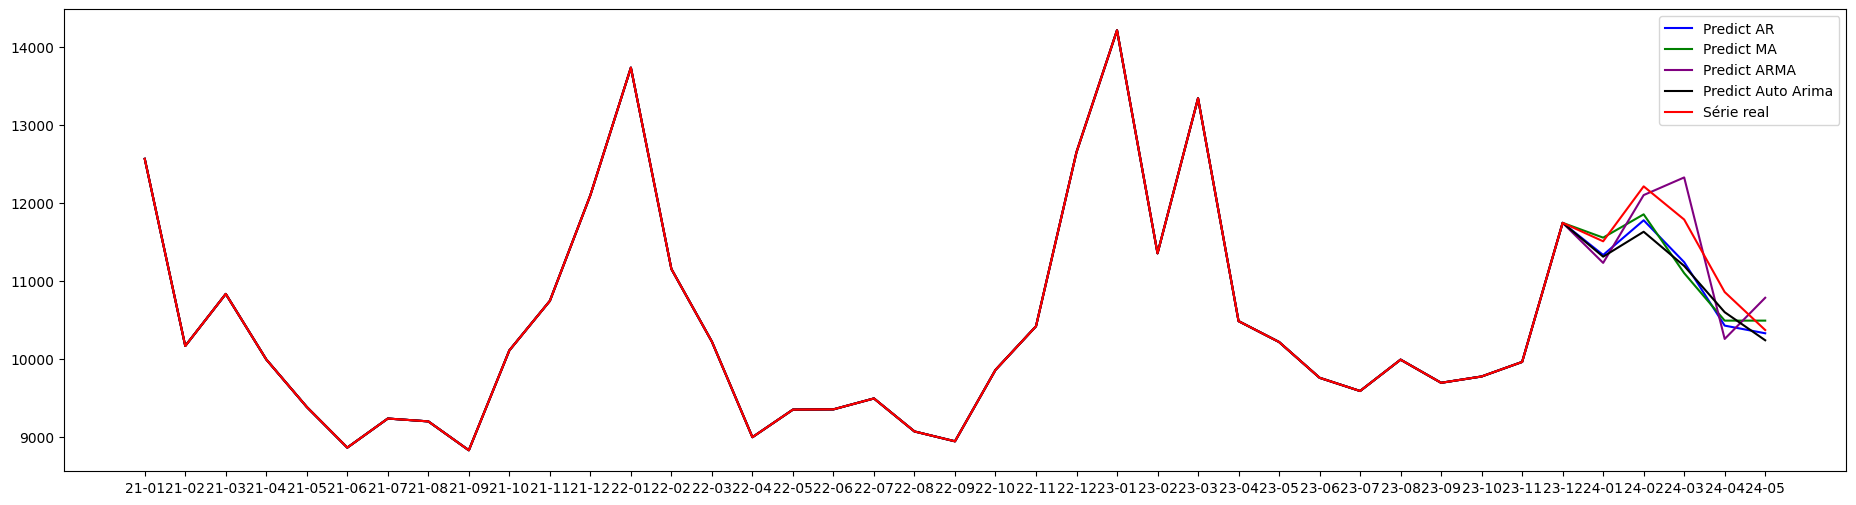

In [228]:
plt.plot(serie_total_ar, color='blue', label='Predict AR')
plt.plot(serie_total_ma, color='green', label='Predict MA')
plt.plot(serie_total_arma, color='purple', label='Predict ARMA')
plt.plot(serie_total_auto, color='black', label='Predict Auto Arima')
plt.plot(serie1_pdseries, color='red', label='Série real')
plt.legend(loc='best')

Aqueles que apresentaram os melhores resultados foram o modelo MA e o modelo ARMA. 

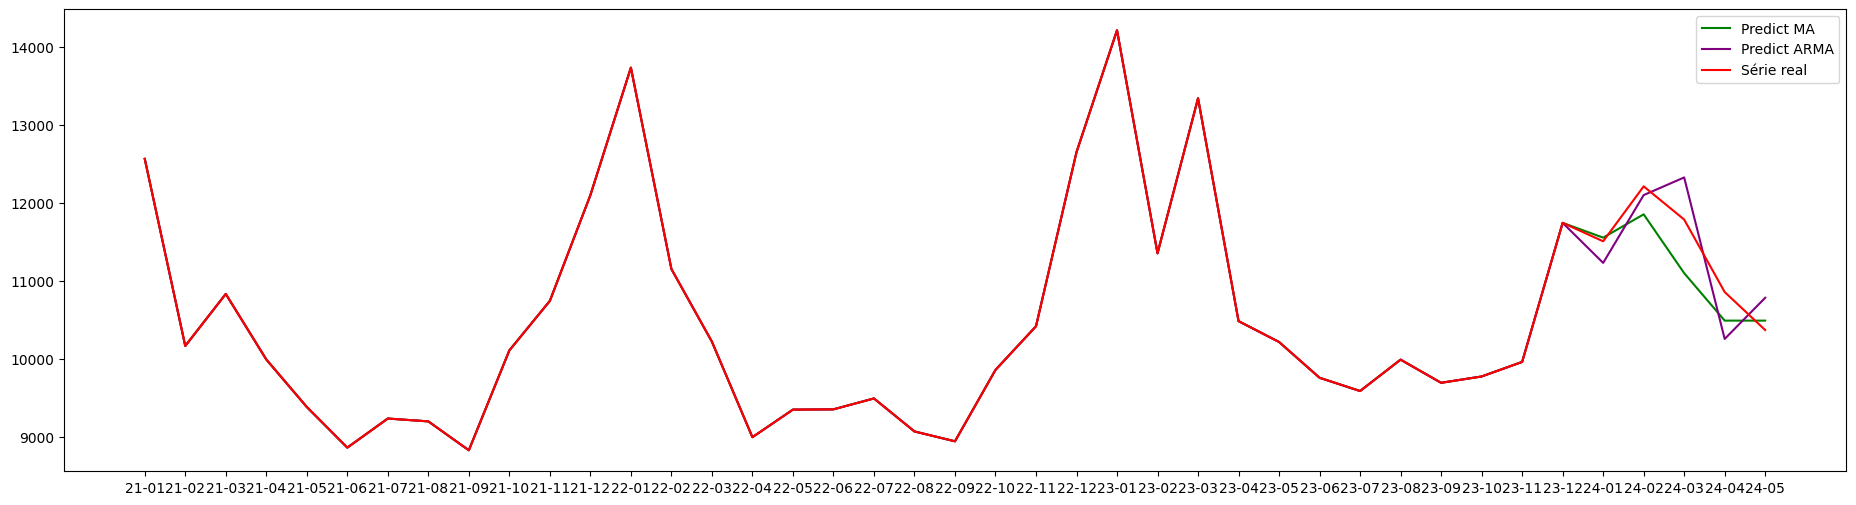

In [229]:
plt.plot(serie_total_ma, color='green', label='Predict MA')
plt.plot(serie_total_arma, color='purple', label='Predict ARMA')
plt.plot(serie1_pdseries, color='red', label='Série real')
plt.legend(loc='best')

In [235]:
serie_true = serie1_pdseries[36:41]
predict_ma = serie_total_ma[36:41]
predict_arma = serie_total_arma[36:41]

24-01    11233.475481
24-02    12102.512771
24-03    12328.618392
24-04    10258.971652
24-05    10786.507227
dtype: float64


In [239]:
mse_ma = mean_squared_error(serie_true, predict_ma)
mse_arma = mean_squared_error(serie_true, predict_arma)
mape_ma = mean_absolute_percentage_error(serie_true, predict_ma)
mape_arma = mean_absolute_percentage_error(serie_true, predict_arma)

In [242]:
print(f'MSE do modelo MA: {mse_ma}')
print(f'MSE do modelo ARMA: {mse_arma}')

if mse_ma > mse_arma:
    print('Modelo ARMA é melhor')
else:
    print('Modelo MA é melhor')

MSE do modelo MA: 150249.0587614135
MSE do modelo ARMA: 182531.07234058276
Modelo MA é melhor


In [243]:
print(f'MAPE do modelo MA: {mape_ma}')
print(f'MAPE do modelo ARMA: {mape_arma}')

if mape_ma > mape_arma:
    print('Modelo ARMA é melhor')
else:
    print('Modelo MA é melhor')

MAPE do modelo MA: 0.027412872370933254
MAPE do modelo ARMA: 0.03483726280889528
Modelo MA é melhor


MODELO SELECIONADO: MODELO MA ()